# Detecting Depression through NLP and DL

1. Evelyn Peh Ting Yu
2. Koh Pei Ling
3. Lau Wei Ting
4. Song Yu Xiang
5. Jian Yi
6. Luqman Juzaili

## 1. Import Libraries

In [201]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
stop=nltk.corpus.stopwords.words('english')

from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer

from wordcloud import WordCloud


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from collections import defaultdict

from sklearn.metrics import classification_report

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 500)
pd.get_option('max_colwidth')
pd.set_option('max_colwidth', 500)

## 2. Import Datasets

In [3]:
df2 = pd.read_csv("Mental-Health-Twitter.csv")  #emoji datatset
df1 = pd.read_csv("sentiment_tweets3.csv")

In [4]:
df1.head()

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
df1.rename(columns={'message to examine':"Message"},inplace=True)
df1.rename(columns={'label (depression result)':"Label"},inplace=True)

In [6]:
df1.columns

Index(['Index', 'Message', 'Label'], dtype='object')

In [7]:
df1.drop(["Index"],inplace=True,axis=1)

In [8]:
df1.head(100)
# df1.sample(10)

,Message,Label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,so sleepy. good times tonight though,0
6,"@SilkCharm re: #nbn as someone already said, does fiber to the home mean we will all at least be regular now",0
7,23 or 24ï¿½C possible today. Nice,0
8,nite twitterville workout in the am -ciao,0
9,"@daNanner Night, darlin'! Sweet dreams to you",0


In [9]:
df2.head(10)

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain has other ideas...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and are great for beginners too! Get stitching with October's Sew on sale NOW! #yay http://t.co/…,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1013187241,84,211,251,837,1,1
5,5,637692793083817985,Sat Aug 29 18:26:24 +0000 2015,Making packing lists is my new hobby... #movinghouse,1013187241,84,211,251,837,1,1
6,6,637691649943072772,Sat Aug 29 18:21:51 +0000 2015,At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse,1013187241,84,211,251,837,1,1
7,7,637689418472652800,Sat Aug 29 18:12:59 +0000 2015,Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...,1013187241,84,211,251,837,0,1
8,8,637687177946734592,Sat Aug 29 18:04:05 +0000 2015,"Can't be bothered to cook, take away on the way 😁👍🏼 #lazy",1013187241,84,211,251,837,0,1
9,9,637684866906255360,Sat Aug 29 17:54:54 +0000 2015,RT @itventsnews: ITV releases promo video for the final series of Downton Abbey http://t.co/mC8Ive72zR http://t.co/CFBKrRvJIs,1013187241,84,211,251,837,41,1


In [10]:
df2.drop(columns=["Unnamed: 0", "post_id", "post_created","user_id",'followers', 'friends', 'favourites', 'statuses', 'retweets'], inplace=True)

In [11]:
df2.rename(columns={"post_text": "Message"}, inplace=True)
df2.rename(columns={"label": "Label"}, inplace=True)

In [12]:
df2.sample(10)

,Message,Label
17480,@shakakans fucking nice work. You on 8%?,0
18087,Flaman Fitness Kamloops https://t.co/oXXZ3vOu7l,0
3807,@MayraWestAf aint shit changed but your uterus.,1
15633,@marijuanx chicken legs. We already established this before.,0
4532,@vividgrim just live streaming but with the main focus being music. I just finished streaming volume 2 of the kill la kill ost.,1
6695,Cosmetic and Clinical Applications of Botulinum Toxin http://bit.ly/YzQXi,1
1103,Went to the gym today for the first time in forever!! Wanted to kill my legs.. Mission accomplished!… http://t.co/ubX2jlHpFi,1
16533,@MEETtheBatman @ChaldeaPrince @anashssn @dollahkhair I dont even need you hoes attention. Dey cheap af.,0
1129,I'm doing #TurboFire - Fire 45 EZ Class in Team Beachbody's SuperGym. Join Me! Go to http://t.co/wA4k6PZNXo,1
4879,@JamesBourne #askjb what do you want for xmas this year? 🎅🎄,1


## 3. Merging Datasets (Without Text Pre-processing)

In [13]:
df_uncleaned = pd.concat([df1,df2])

In [14]:
df_uncleaned.shape

(30314, 2)

## 4. Check and Drop Duplicate

In [15]:
df_uncleaned.duplicated().sum()

543

In [16]:
df_uncleaned.drop_duplicates(inplace=True)

In [17]:
##Checking for null values
df_uncleaned.isnull().sum()

Message    0
Label      0
dtype: int64

In [18]:
df_uncleaned.columns

Index(['Message', 'Label'], dtype='object')

## 5. Exploratory Data Analysis
source: https://www.kaggle.com/code/shahules/basic-eda-cleaning-and-glove

Findings about Target  Variable: 
> imbalance dataset with 59% non-depressive, 41% depressive

In [19]:
df_uncleaned.Label.value_counts(normalize = True)

0    0.590037
1    0.409963
Name: Label, dtype: float64

<AxesSubplot:xlabel='Label', ylabel='count'>

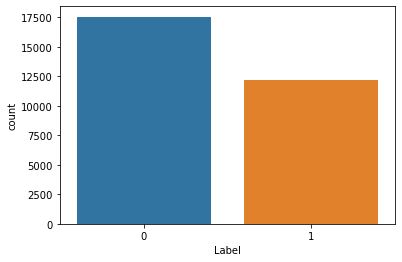

In [20]:
sns.countplot(x=df_uncleaned["Label"])

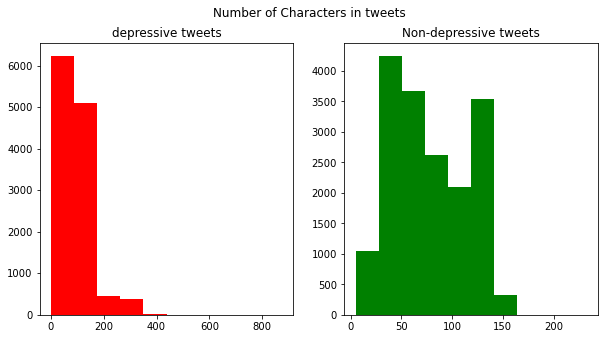

In [21]:
## Number of character

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
fig.suptitle('Number of Characters in tweets')

#depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==1]['Message'].str.len()
ax1.hist(tweet_len,color='red')
ax1.set_title('depressive tweets')

#non-depressive
tweet_len=df_uncleaned[df_uncleaned['Label']==0]['Message'].str.len()
ax2.hist(tweet_len,color='green')
ax2.set_title('Non-depressive tweets')

plt.show()

##### Common stopwords in tweets

> In both of classes, "the", "to", "a" dominates 

In [22]:
def create_corpus(target):
    corpus=[]
    
    for x in df_uncleaned[df_uncleaned['Label']==target]['Message'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

<BarContainer object of 10 artists>

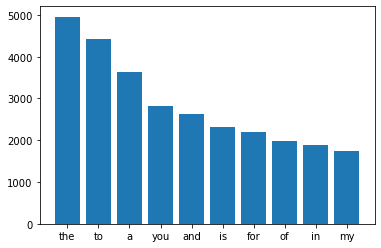

In [23]:
corpus=create_corpus(0)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

<BarContainer object of 10 artists>

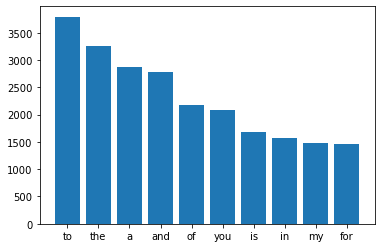

In [24]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 

x,y=zip(*top)
plt.bar(x,y)

##### Number of Stop Words in a sentence on average 


In [25]:
# This will return us the percentage of Stop Words in Each Tweet. 

percentage_of_stop_word_in_each_tweet = []

def percentage_of_stop_word():
    for x in df_uncleaned['Message']:
        stop_word = 0.0
        total_word_per_sentence = 0.0
        for each_word in x.split(" "):
            if each_word in stop:
                stop_word += 1
            total_word_per_sentence += 1
        
        percentage_of_stop_word_in_each_tweet.append(stop_word/total_word_per_sentence)
    

percentage_of_stop_word()


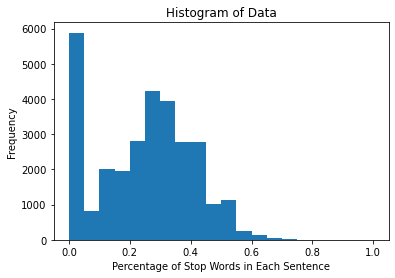

In [26]:
import matplotlib.pyplot as plt

data = percentage_of_stop_word_in_each_tweet

# Create a histogram with 0.05 bin width
bins = list(map(lambda x: x / 20, range(21)))
plt.hist(data, bins=bins)

# Add labels and title
plt.xlabel('Percentage of Stop Words in Each Sentence')
plt.ylabel('Frequency')
plt.title('Histogram of Data')

# Show the histogram
plt.show()


##### Common punctuation in tweets

<BarContainer object of 25 artists>

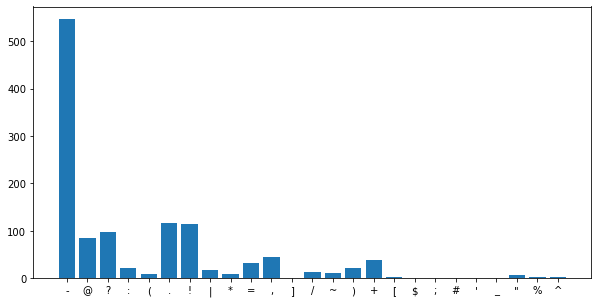

In [27]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

<BarContainer object of 23 artists>

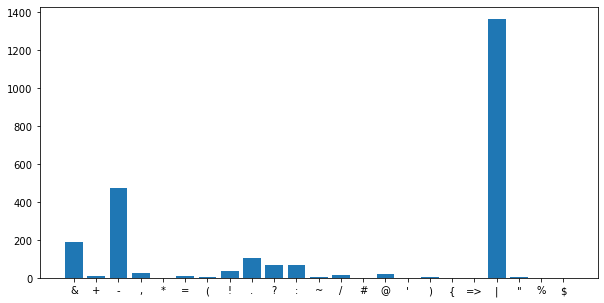

In [28]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
        
x,y=zip(*dic.items())
plt.bar(x,y)

##### Common Words

In [29]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
    all_words = ' '.join([text for text in x])
    all_words = all_words.split()

    fdist = FreqDist(all_words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

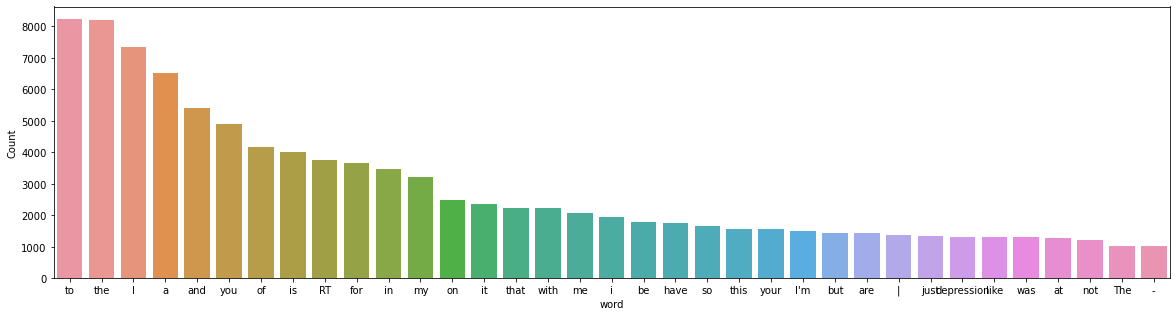

In [30]:
freq_words(df_uncleaned['Message'], 35)

#### Word Cloud

In [31]:
# python -m pip install wordcloud

In [32]:
from PIL import Image

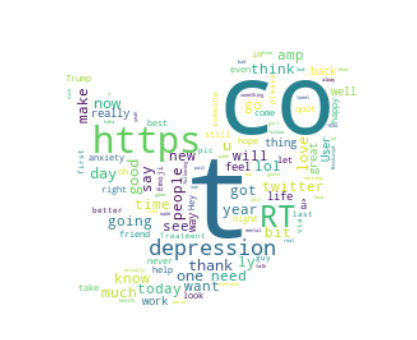

In [33]:
depressive_words = ' '.join(list(df_uncleaned['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

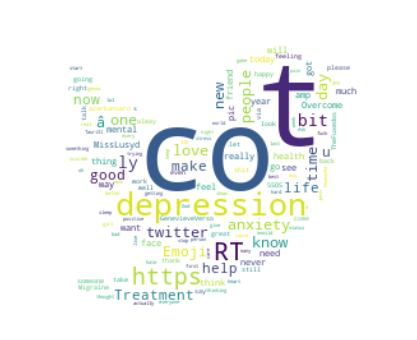

In [34]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

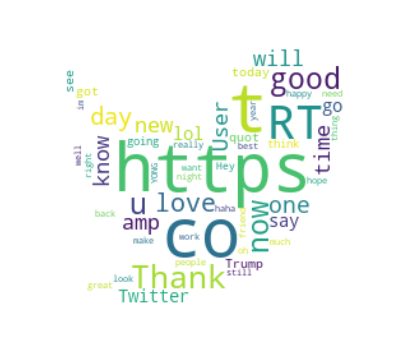

In [35]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, mask=mask, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

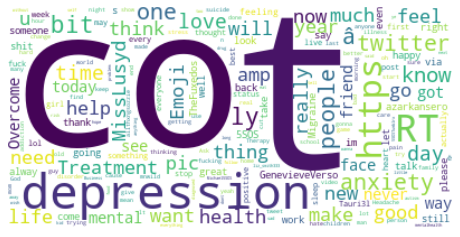

In [36]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 1]['Message']))
# mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

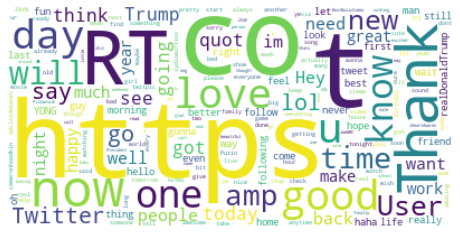

In [37]:
depressive_words = ' '.join(list(df_uncleaned[df_uncleaned['Label'] == 0]['Message']))
# mask = np.array(Image.open("Twitter.png"))
depressive_wc = WordCloud(collocations=False, background_color="white").generate(depressive_words)
plt.figure(figsize = (8, 6))
plt.imshow(depressive_wc, interpolation="bilinear")
plt.axis("off")
plt.show()

##### Ngram Analysis

Bigram (n=2) analysis over the tweets to check the most common bigrams in tweets.

In [38]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

<AxesSubplot:>

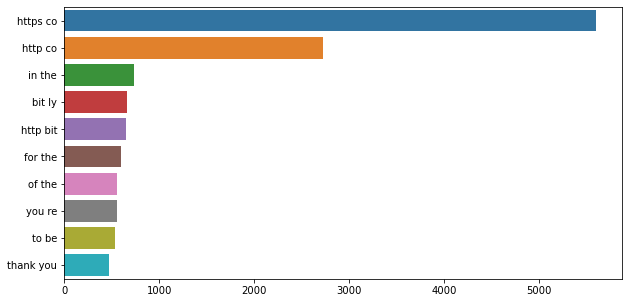

In [39]:
plt.figure(figsize=(10,5))
top_tweet_bigrams=get_top_tweet_bigrams(df_uncleaned['Message'])[:10]
x,y=map(list,zip(*top_tweet_bigrams))
sns.barplot(x=y,y=x)

> Hence the most frequent words are often unimportant words such as https which is an internet protocol and other words that does not echo much meaning for people identified with depression. Therefore, there is a need of thorough data cleaning 


## 5. Data Cleaning for the merged dataset 

https://www.kaggle.com/code/ardawrld/twitter-sentiment-analysis-about-the-depression

In [40]:
df2.shape

(20000, 2)

In [41]:
## Remerge the data after dropping all RT in the 2nd data set -- substr = "RT @" 

df2 = df2[~df2.Message.str.contains("RT @")]
df_uncleaned = pd.concat([df1,df2])

In [42]:
df_uncleaned.shape

(26609, 2)

In [43]:
df2.head(100)

,Message,Label
0,It's just over 2 years since I was diagnosed with #anxiety and #depression. Today I'm taking a moment to reflect on how far I've come since.,1
1,"It's Sunday, I need a break, so I'm planning to spend as little time as possible on the #A14...",1
2,Awake but tired. I need to sleep but my brain has other ideas...,1
4,It’s hard to say whether packing lists are making life easier or just reinforcing how much still needs doing... #movinghouse #anxiety,1
5,Making packing lists is my new hobby... #movinghouse,1
6,At what point does keeping stuff for nostalgic reasons cross the line into plain old hoarding...? #movinghouse,1
7,Currently in the finding-boxes-of-random-shit packing phase. I think I’m a closet hoarder...,1
8,"Can't be bothered to cook, take away on the way 😁👍🏼 #lazy",1
10,"... also, I have too much stuff. Way, way too much #movinghouse",1
11,I never want to put one of these together again #lotharderthanitlooks http://t.co/70ujlTCKlB,1


### 5.1 Conversion to all Lower Case 

In [44]:
def text_to_lower(text):
    text = text.lower()
    return text

In [45]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:text_to_lower(x))

In [46]:
df_uncleaned.sample(50)

,Message,Label
19170,user:chachead https://t.co/0l6ofpxilu https://t.co/blz5nskrxl,0
3128,@jonas brothers: i love u in your next tour please come to venezuela!,0
16253,@gaj_2 can i cc this to twt_transgender,0
4783,good nite everyone sweet dreams,0
6716,my first cortisone shot ever has been 1 week ago in a disc? http://bit.ly/fgyqm,1
6016,@shauna_nkotb_ca yup....poppin in and out every so often.,0
5195,@flick101studio hahaa..ok set! give me the time and date. place.. haha.,0
6955,suicide mental health bi polar depression near death experience? http://bit.ly/16mw6f,1
8280,#heyeverybody is number 4 on the top trending list for the us! @5sos @michael5sos @ashton5sos @luke5sos @calum5sos http://t.co/hu5glywnqg,1
244,searching for a #therapist that meets on weekends? https://t.co/i0kyqs5ccm,1


### 5.2 Removal of HTML entities 

In [47]:
# These are the HTML Entities 
html_entities = {'&nbsp;': '', '&iexcl;': '', '&cent;': '', '&pound;': '', '&curren;': '', '&yen;': '', '&brvbar;': '', 
                  '&sect;': '', '&uml;': '', '&copy;': '', '&reg;': '', '&trade;': '', '&macr;': '', '&deg;': '', 
                  '&plusmn;': '', '&sup2;': '', '&sup3;': '', '&acute;': '', '&micro;': '', '&para;': '', '&middot;': '', 
                  '&cedil;': '', '&sup1;': '', '&ordm;': '', '&raquo;': '', '&frac14;': '', '&frac12;': '', '&frac34;': '', 
                  '&iquest;': '', '&Agrave;': '', '&Aacute;': '', '&Acirc;': '', '&Atilde;': '', '&Auml;': '', 
                  '&Aring;': '', '&AElig;': '', '&Ccedil;': '', '&Egrave;': '', '&Eacute;': '', '&Ecirc;': '', '&Euml;': '', 
                  '&Igrave;': '', '&Iacute;': '', '&Icirc;': '', '&Iuml;': '', '&ETH;': '', '&Ntilde;': '', '&Ograve;': '', 
                  '&Oacute;': '', '&Ocirc;': '', '&Otilde;': '', '&Ouml;': '', '&times;': '', '&Oslash;': '', 
                  '&Ugrave;': '', '&Uacute;': '', '&Ucirc;': '', '&Uuml;': '', '&Yacute;': '', '&THORN;': '', '&szlig;': '', 
                  '&agrave;': '', '&aacute;': '', '&acirc;': '', '&atilde;': '', '&auml;': '', '&aring;': '', '&aelig;': '', 
                  '&ccedil;': '', '&egrave;': '', '&eacute;': '', '&ecirc;': '', '&euml;': '', '&igrave;': '', '&iacute;': '', 
                  '&icirc;': '', '&iuml;': '', '&eth;': '', '&ntilde;': '', '&ograve;': '', '&oacute;': '', '&ocirc;': '', 
                  '&otilde;': '', '&ouml;': '', '&divide;': '','&amp;': '', '&lt;': '', '&gt;': '', '&quot;': '', '&apos;': ''}

In [48]:
html_re = re.compile('(%s)' % '|'.join(html_entities.keys()))

def replace_html_entities(text,contractions_dict=html_entities):
  def replace(match):
    return html_entities[match.group(0)]
  return html_re.sub(replace, text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:replace_html_entities(x))


In [49]:
df_uncleaned.sample(100)

,Message,Label
14510,@xqueeee bet i gotchu,0
1983,tweet dreams,0
1703,e-therapeutics starts phase iib trial of ets6103 in major depressive disorder | depression treatments | http://t.co/3qklkvkyf6,1
12488,"@joenbc @alabamaftbl @sen_joemanchin who cares joe? talk about english 'fot ball"" or when you were in office, as you one did all the time!",0
5300,feeding fish is fun http://bit.ly/19n8w4,0
14625,they say i was the abomination of obama's nation,0
3504,"@geekporngirl yes, that was me",0
13194,@truthfeednews trump stuck to you and your family for the rest of your life,0
5388,"@rgutel making a youtube video of your ultrasounds does not make you a dork, it makes you a mom.",0
9876,"#morningmemo \r\ndespite how open, peaceful and loving you attempt to be , people can only meet you, as deeply as... http://t.co/oefujltquw",1


### 5.3 Removal of Hashtags

In [50]:
# Removal of HashTag
def remove_hashtags (text):
    text = re.sub(r"#\w+", '', text, flags=re.MULTILINE)
    return(text)


In [51]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_hashtags(x))

In [52]:
df_uncleaned.sample(100)

,Message,Label
1769,unknown title | http://t.co/5kuukzuhtu,1
1534,i'm home and uploading today's episode of dream tv up on facebook and youtube!,0
4206,"cool, i just figured out how to change the template file of my wordpress theme to my liking.",0
113,@superhootie maybe... just maybe!,0
1374,@justine_hughes nooo high on life lol hows u?,0
2640,@_heatherbailey terminator! and tell me how fantastic it is,0
5573,yay!! it's friday! mizsmith has a new post. check it out at www.mizsmith.com enjoy your weekend!,0
9444,fuck i love like bein a hoassnigga beatin around the bush..\r\nbitch i don't play wit my time,1
1034,off today! no wonder i love mondays! movie theatre....here i come.,0
2230,"@m1ssg0rjess of course you love it, you got it from miss lisa marie",0


### 5.4 Conversion of contractions

In [53]:
# Converting it to string type
df_uncleaned['Message'] = df_uncleaned['Message'].astype("str")
df_uncleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26609 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Message  26609 non-null  object
 1   Label    26609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 623.6+ KB


In [54]:
contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "i'd": "i would", "i'd've": "i would have","i'll": "i will",
                     "i'll've": "i will have","i'm": "i am","i've": "i have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have",
                    
                    "aint": "are not","'s":" is","arent": "are not",
                     "cant": "cannot","cantve": "cannot have",
                     "'cause": "because","couldve": "could have","couldnt": "could not",
                     "couldntve": "could not have", "didnt": "did not","doesnt": "does not",
                     "dont": "do not","hadnt": "had not","hadnt've": "had not have",
                     "hasnt": "has not","havent": "have not","hed": "he would",
                     "hedve": "he would have","hell": "he will", "hellve": "he will have",
                     "howd": "how did","howdy": "how do you","howll": "how will",
                     "id": "i would", "id've": "i would have","ill": "i will",
                     "illve": "i will have","im": "i am","ive": "i have", "isnt": "is not",
                     "itd": "it would","itd've": "it would have","itll": "it will",
                     "itll've": "it will have", "lets": "let us","maam": "madam",
                     "maynt": "may not","mightve": "might have","mightnt": "might not", 
                     "mightntve": "might not have","mustve": "must have","mustnt": "must not",
                     "mustn'tve": "must not have", "neednt": "need not",
                     "needn'tve": "need not have","oclock": "of the clock","oughtnt": "ought not",
                     "oughtntve": "ought not have","shant": "shall not","shant": "shall not",
                     "shantve": "shall not have","shed": "she would","shedve": "she would have",
                     "shell": "she will", "shellve": "she will have","shouldve": "should have",
                     "shouldnt": "should not", "shouldntve": "should not have","sove": "so have",
                     "thatd": "that would","thatdve": "that would have", "thered": "there would",
                     "theredve": "there would have", "theyd": "they would",
                     "theydve": "they would have","theyll": "they will",
                     "theyllve": "they will have", "theyre": "they are","theyve": "they have",
                     "tove": "to have","wasnt": "was not","wed": "we would",
                     "wedve": "we would have","well": "we will","well've": "we will have",
                     "were": "we are","weve": "we have", "werent": "were not","whatll": "what will",
                     "whatllve": "what will have","whatre": "what are", "whatve": "what have",
                     "whenve": "when have","whered": "where did", "whereve": "where have",
                     "wholl": "who will","whollve": "who will have","whove": "who have",
                     "whyve": "why have","willve": "will have","wont": "will not",
                     "wontve": "will not have", "wouldve": "would have","wouldnt": "would not",
                     "wouldntve": "would not have","yall": "you all", "yalld": "you all would",
                     "yalldve": "you all would have","yallre": "you all are",
                     "yallve": "you all have", "youd": "you would","youdve": "you would have",
                     "youll": "you will","youllve": "you will have", "youre": "you are",
                     "youve": "you have"}

contractions_re = re.compile('(%s)' % '|'.join(contractions_dict.keys()))

def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

In [55]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:expand_contractions(x))

In [56]:
df_uncleaned.sample(50)

,Message,Label
16504,true love is basically me holding andy for the first ti ame. i can sti will remember opening the box like it was just last october.,0
17948,zayn for best vi wouldeo \r\n by @zaynmalik for at the ! https://t.co/oz4hz29hnf,0
8349,is it me or is the world going through a collecti have existential depression?,1
12425,wikileaks hints at plan to create ominous ‘big brother’ database https://t.co/daronvrpeu via @heatstreet,0
17225,what is your favorite color??\r\n\r\ngopayt dreamteamyong,0
7135,@poundifdef you forgot: pun intended,0
9014,@thefuxedos @tauri3l @misslusyd @tski amoongoddess @azarkansero *find,1
3098,"@rebeccajudd bless her, alot of people think she di would 4 votes. god sake shes 10!! ehm, di haverst, flawless or ai wouldan. hope susan dusnt win. x",0
5353,says apir hehehe http://plurk.com/p/y5l9q,0
5601,best day ever for having a convertible,0


### 5.5 Removal of URL

In [57]:
def remove_urls (text):
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', text, flags=re.MULTILINE)
    return(text)

In [58]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_urls(x))

In [59]:
df_uncleaned.sample(50)

,Message,Label
7402,"people use the phrase ""like herding cats"" to describe something difficult futile.\r\n\r\nbut i am actually, like, really good at herding cats.",1
4581,@klovesnkotb ohhh ok i was just wonder lol was not sure who was going,0
4416,@aartorias starting off your new year we will huh?,1
14190,@battlafield @baba_khan5 uh huh,0
1020,my mom likes milow is version of ayo technology... it is a good thing she does not have a clue what it is about.,0
5708,@adrielove yes i saw hi am. omg it totally di would haha! i know right? i thought it was funny. so what are you doin' missy?,0
2401,nanny asks: i have always fi willed out a w-2 but i am starting a part-ti ame job for two days a week and the pare nots had...,1
850,significannot undertreatment of :,1
15871,i do not know what people would think if the walk in only to see me practicing the perfect right angle dab in front of the mirror.,0
3055,"bar-b-q tonight, i wouldk what else before that though, besi wouldes panera is breakfast food",0


In [60]:
df_uncleaned.shape

(26609, 2)

### 5.6 Removal of Mentions/Retweets User Accounts 
- This does not remove the row itself. 

In [61]:
def remove_mentions_user (text):
    text = re.sub(r"@\w+", '', text, flags=re.MULTILINE)
    return(text)

In [62]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_mentions_user(x))

In [63]:
df_uncleaned.sample(50)

,Message,Label
8884,"i used to eat nothing but processed foods & had between 5-10 energy drinks a day to combat the amount of weed i was smoking. i hated my job, hated my flatshare & self-medicated my depression/anxiety with anything that triggered dopamine. i am glad to have put that behind me <emoji: victory hand (light skin tone)>",1
4320,"pretty epic weekend of fun and nonsense. now? working, then getting coffee with my dad before seeing drag me to he will!",0
16631,"wishlist: \r\n\r\nto work at a fast food restaurant and when someone says ""saya nak isi ayam satu"", i wi will throw a whole chicken at them.",0
1200,are you doing something everyday that wi will get you closer to your goals?,1
6443,"wouldaley sounds lovely, hope the rest of your weekend is a really great one and that you are spoiled a little more",0
7088,lakers won!!! ot went exactly how it should have,0
1500,would you be available to play in our charity match in may for ?,1
1605,marks spencer cupcakes = yum,0
60,i keep seeing comments that the pilot was saved. if true i find that quite incredible,1
1860,"he sai would yes guys, i am now engaged.",0


### 5.7 Removal of Punctuation

In [64]:
def remove_punctuations (text):
    text = re.sub(r"""[!"¦#$%&\'()*+,-./:;<=>?@[\\\]^_`{|}~،؟…«“\":\"…”]""", '', text, flags=re.MULTILINE)
    return(text)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:remove_punctuations(x))

In [65]:
df_uncleaned.sample(100)


,Message,Label
13819,i see in that case i should go see en no ozuno,0
5412,just voted green party just hope it is enough to keep the evil bnp out,0
10079,sorry for not being acti have lately my depression is getting the best of me emoji pensi have face love you all very much emoji beating heartemoji beating heartemoji beating heart pictwittercomherk360cyg,1
17232,follow instructions guyz \r\npara happy tayo\r\n\r\ngopayt dreamteamyong,0
9887,once i figure out how to have a regular sleep sche wouldule its over for my depression emoji call me handemoji open hands signemoji pensi have face pictwittercomseqgnrljkz,1
9399,when friends struggle with depression this app helps avoi would potentially harmful phrases,1
4053,thank you i hope so too,1
9366,iight i restarted my shit n the sounds backthat is crazy tho i was about to be mad af,1
19883,beware of bugs in the above code i have only proved it correct not tried it ― donald knuth,0
158,amkardashian hey ki am i am a huge fan ur like my role model and i really hope i can actually meet u one day,0


### 5.8 Removal of numbers

In [66]:
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')

C:\Users\evely\AppData\Local\Temp\ipykernel_11484\826882887.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('\d+', '')


In [67]:
df_uncleaned.sample(100)

,Message,Label
7357,i need to go take a wiz khalifa,1
2716,change addiction now steps of change,1
11707,king james should have brought luggage on that one because he sure was traveling,0
9653,probably quite the opposite if you cured your depression that was not depression,1
6810,drug update treatment of cluster headaches,1
12951,netflix’s ‘the crown’ whitewashes the naziloving royal via wouldailybeast a thought to russian rule,0
12393,way to go joysending plus tweet a day with picturesi amages consi woulder asking others please think,0
5877,someone stole my m and i was not very happy as i was just about to buy the last statue to complete my island😓,1
9472,i sound unempathetic i sound mean and rude suici woulde is an epi wouldemic and i do not wanna be misconstrued signs of depression go overlooked so if you are depressed then you need to be book a therapy session and talk about your depression let a professional hear it,1
12129,wait it is raining again this weather makes me want to curl up all day with a book,0


### 5.9 Emojis to textual description conversion

Translate emojis to their textual description. This is to ensure that the sentiment value that an emoji contain will also be considered by the model in future parts.
- Utilise TweetTokenizer to split tweets on a list of words, while treating the emoji as a word itself.
- Utilise Emoji demojize to convert the graphical representation of the emoji to its textual representation which seperated by underscore when the description is more than 1 word e.g., smiling_beaming_face, tears_of_joy

**CHOOSE ONE**
- Retained the text description as it is to differentiate that this phrase is conveyed as an emoji
- Combined the textual description of emojis e.g., "smiling_beaming_face" as "smilingbeamingface" so as to remove special characters that may cause complication in the model in future parts
- Seperate the textual description of emojis e.g, "smiling_beaming_face" as ['smiling','beaming','face'] to consider it as normal words

In [68]:
# pip install emoji-unicode
# pip install emoji --upgrade
# pip uninstall emoji
# pip install emoji==1.7

In [69]:
import emoji
from nltk.tokenize.casual import TweetTokenizer


#### Need to choose one method (How do we store emoji textual description)

In [70]:
## Start of Tweet Tokenizer

## Use Cases to think about
## smiling_cat_face_with_heart-eyes

from emoji import UNICODE_EMOJI

# helper function for convert_emojis; return true if token is an emoji
def is_emoji(s):
    return s in UNICODE_EMOJI

# Break up sentences into list of words while considering emojis
def store_emojis(text):
    
    # break up tweets into words while considering emojis as itself e.g., ['this','is','cool','😁','👍']
    tweet_list = TweetTokenizer().tokenize(text)
    tweet_string = convert_emojis(tweet_list)
    return tweet_string

# Convert emojis into text form
# Method 1: Underscore format - (Retain the actual representation as it is)
# def convert_emojis(text):
#     new_text = []
    
#     for i in range(len(text)):
#         if is_emoji(text[i]):
#             temp = emoji.demojize(text[i], delimiters=("",""))
#             new_text.append(temp)
#         else:
#             new_text.append(text[i])
    
    
#     return ' '.join([str(item) for item in new_text])

# Method 2: Combine together e.g., "red_face" becomes "redface"
# def convert_emojis(text):
#     new_text = []
    
#     for i in range(len(text)):
#         if is_emoji(text[i]):
#             temp = emoji.demojize(text[i], delimiters=("",""))
            
#             if "_" in temp:
#                 temp = temp.split("_")
#                 temp = "".join(temp)

#             new_text.append(temp)
#         else:
#             new_text.append(text[i])
        
#     return ' '.join([str(item) for item in new_text])

# Method 3: Seperate them as normal words e.g., "red_face" becomes ['red','face']
def convert_emojis(text):
    new_text = []
    
    for i in range(len(text)):
        if is_emoji(text[i]):
            temp = emoji.demojize(text[i], delimiters=("",""))
            
            if "_" in temp:
                temp = temp.split("_")
            
            for item in temp:
                new_text.append(item)
        else:
            new_text.append(text[i])
        
    return ' '.join([str(item) for item in new_text])



    

In [71]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x:store_emojis(x))

In [72]:
df_uncleaned.sample(100)

,Message,Label
10280,tryna listen to happy songs instead of sad songs to try and undo my depression oof,1
8673,i wrote a piece for is blog called the benefits of writing to your mental health which you can read here postthebenefitsofwritingtoyourmentalhealthâ â  i mentioned in the piece a story i wrote to help me through my depression share some of i t on my blog here,1
19515,alexandrea is house is now following me on twitter thank you alexandrea is house say he willo,0
4327,not since fri woulday but its all good its all good,0
13700,i wi will pray for your safety and success be careful,0
8472,i can get tipsy after a sip of white wine so yeah i am,1
1702,that response fits perfectly for the diva comboarchetype btw,0
8059,they saved me from depression pictwittercomdurczpqonf,1
4964,this photo right before smacked on the bum 😅 😊,1
9401,may i remind you pips depression is not a joke and i t wi will never be a joke,1


### 5.10 Removal of StopWords 


In [73]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))

print(stopWords)


{'re', 'now', 'each', "shouldn't", "you'd", 'd', 'itself', 'other', 'nor', 'which', "haven't", 'only', 'a', 'those', 'have', 'aren', 'after', 'between', 'than', 'yours', 'it', 'some', "it's", "mightn't", 'most', "didn't", 'does', "isn't", 'hers', 'they', 'me', 'when', 'will', 'into', 'where', 'y', "weren't", 'whom', "don't", 'not', 'here', "should've", 'same', 'mightn', 'of', 'yourself', "that'll", 'wouldn', 'during', 'him', 'too', 'down', 'should', 'all', 'didn', 'ourselves', 'yourselves', 'or', 'can', 'is', 'be', 'ours', 'hadn', 'with', 'this', 'his', 'as', 'until', 'again', 'doing', 'needn', 'you', "won't", 'these', 'very', "doesn't", 'll', 'an', 'we', 'myself', 'so', 'before', "she's", 'ma', 'in', 'if', 'were', "couldn't", 'my', 'once', 'did', "you'll", 'under', 'its', 'few', 'doesn', 'who', 'was', "hasn't", 'won', 'any', 'herself', 'off', 'against', 'weren', 'them', 'are', 'no', "hadn't", "you're", 'couldn', 'from', 'themselves', 'm', 'over', 'shouldn', 'shan', 'haven', "needn't",

In [74]:
from string import printable
st = set(printable)
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ''.join([" " if  i not in  st else i for i in x]))

In [75]:
import nltk 
def remove_stopwords(paragraph):
  words = nltk.word_tokenize(paragraph)
  wordlist_wo_stopwords=[]
  for w in words:
    if w not in stopWords:
        wordlist_wo_stopwords.append(w)
  print(wordlist_wo_stopwords)

  return wordlist_wo_stopwords

# data1['Message'].replace({r'[^\x00-\x7F]+':''}, regex=True, inplace=True)
df_uncleaned['Message'] = df_uncleaned['Message'].astype(str)
df_uncleaned['Message'] = df_uncleaned['Message'].str.replace('[^a-zA-Z0-9]', ' ', regex=True).str.strip()
df_uncleaned['Message'] = df_uncleaned['Message'].apply(remove_stopwords)

['real', 'good', 'moment', 'missssssssss', 'hi', 'much']
['reading', 'manga']
[]
['need', 'send', 'em', 'accountant', 'tomorrow', 'oddly', 'even', 'referring', 'taxes', 'supporting', 'evi', 'wouldence', 'though']
['add', 'myspace', 'myspacecomlookthunder']
['sleepy', 'good', 'ti', 'ames', 'tonight', 'though']
['someone', 'already', 'sai', 'would', 'fiber', 'home', 'mean', 'wi', 'least', 'regular']
['c', 'possible', 'today', 'nice']
['nite', 'twittervi', 'wille', 'workout', 'ciao']
['night', 'darlin', 'sweet', 'dreams']
['good', 'morning', 'everybody']
['finally', 'created', 'wordpress', 'blog', 'already', 'blog', 'seattle', 'coffee', 'community']
['kisha', 'cnt', 'get', 'u', 'til', 'get', 'frm', 'u', 'remember', 'ur', 'top']
['yes', 'remember', 'band', 'awesome', 'wi', 'please', 'reply']
['really', 'love', 'reflections', 'shadows']
['ooo', 'fantasy', 'like', 'fantasy', 'novels', 'wi', 'check']
['probs', 'sell', 'nothing', 'blog', 'get', 'listen', 'band', 'itunes']
['nokla', 'connecting

['gon', 'na', 'get', 'tan', 'white']
['hrs', 'ti', 'ame', 'wi', 'uni', 'waiting', 'start', 'st', 'exam', 'scary', 'working', 'hard', 'morning', 'though', 'feeling', 'ok', 'atm']
['thanks', 'hint']
['good', 'morning', 'haha', 'read', 'swine', 'flu', 'probably', 'comes', 'pigs', 'people', 'poor', 'pigs', 'got', 'blame']
['play']
['yeah', 'wi', 'lookout', 'tweets', 'happy', 'tweeting']
['goodnight', 'cuppycake', 'hope', 'good', 'day', 'feel', 'blah', 'xxoo']
['get', 'dinner']
['wouldney', 'wolverine', 'great', 'must', 'see']
['forget', 'edinburgh', 'check', 'edinburghacorguk']
['wi', 'deplurk', 'buhbyeee']
['eating', 'tito', 'home', 'made', 'ice', 'cream', 'yum']
['dri', 'sergeant', 'voice', 'everybody', 'wake', 'fuck', 'flicks', 'everyone', 'lights', 'est', 'rise', 'shine', 'beetches', 'lol', 'jk']
['mins', 'ti', 'baby', 'back', 'work']
['good', 'luck']
['oki', 'great', 'best']
['hahahahaha', 'day']
['hypnotyst', 'hmmmm', 'beware']
['bank', 'holi', 'woulday', 'day']
['download', 'movie',

['nice', 'day', 'friend', 'gd', 'bless', 'u']
['everyone', 'back', 'row', 'texting', 'thought', 'would']
['changing', 'password', 'benjamin', 'x', 'abcxq', 'pelda', 'csak', 'aztmondja', 'bad', 'new', 'old', 'password', 'si', 'amilar']
['amothyho', 'haha', 'cannt', 'remember', 'many', 'text', 'updates', 'got', 'fromm', 'youu', 'sleep', 'text', 'later']
['cute', 'dog', 'ya', 'look']
['wishing', 'sun', 'derek', 'awake', 'could', 'show', 'burn', 'cd', 'computer', 'made', 'mix', 'wait', 'bump']
['early', 'night', 'help', 'little', 'sleep', 'ai', 'would', 'edward', 'twilight', 'goodnight', 'zzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzzz']
['wille', 'words', 'show', 'feel']
['thanks', 'sundays', 'good', 'luck', 'sat', 'hope', 'weather', 'amproves', 'us']
['woulds', 'omg', 'crazy', 'weather']
['omg', 'soo', 'cute']
['first', 'twitter', 'everthis', 'feels', 'momentus']
['hey', 'sorry', 'missed', 'tweet', 'saturday', 'always', 'plenty', 'fri', 'wouldays', 'trip', 'going', 'busy', 'u']
['hope', 'run', 'u', 

['love', 'beautiful', 'song', 'great', 'day', 'sunshine']
['gearing', 'flying', 'dance', 'show', 'building', 'sweeney', 'todd', 'weekend']
['thanks', 'sharing', 'links']
['good', 'night', 'twitterlers', 'dreamland', 'positi', 'outlook', 'wi', 'finish', 'schoolwork', 'sunday', 'night']
['hey', 'age', 'man', 'hope', 'going', 'good', 'cape', 'town', 'bro', 'bazd']
['morning', 'really', 'hot', 'sunny', 'day', 'today', 'shall', 'prob', 'relaxing', 'day', 'sun', 'xx']
['picture']
['hope', 'u', 'r', 'good', 'ti', 'ame', 'u', 'get', 'boys', 'tweet', 'us']
['amelow', 'aww', 'babe', 'think', 'might', 'watch']
['ohh', 'til', 'get']
['almost', 'quitting', 'ti', 'ame', 'ti', 'horton', 'breakfast', 'sounds', 'good', 'morning', 'twitter']
['mean', 'ti', 'ame', 'today', 'hanging', 'kendall', 'jane', 'visitors', 'excited', 'rise', 'build', 'sunday']
['night', 'little', 'twitterbirdsxoxo', 'fun', 'thanks', 'laughs', 'talkya', 'later', 'muah']
['good', 'morning', 'good', 'luck', 'math', 'test']
['slept',

['finishe', 'would', 'leadig', 'praise', 'worship', 'grace', 'awesomebut', 'nearly', 'awesome', 'god']
['wow', 'fast', 'enjoy', 'lunch']
['beautiful', 'morning', 'ti', 'ame', 'see', 'everyone', 'doooing']
['envious', 'web', 'events', 'get', 'attend', 'ny', 'absolutely', 'nothing', 'like', 'halifax']
['haha', 'exactly', 'kiss', 'awesome', 'team', 'edward', 'alllll', 'way']
['doggie', 'looks', 'like', 'bailey']
['getting', 'married', 'wouldnesday', 'jonathen', 'wi', 'willinger']
['dooooo']
['hey', 'thanks', 'seems', 'pity', 'eat', 'sounds', 'fairly', 'nutritious']
['found', 'bought', 'awesome', 'book', 'today', 'entitled', 'essays', 'written', 'somethings']
['surfing', 'di', 'would', 'schoolwork', 'getting', 'ready', 'go', 'chuch', 'need', 'know', 'mylo', 'behaving']
['would', 'nice', 'twitpic', 'write', 'caption', 'put', 'subject', 'line']
['emily', 'confused', 'food', 'love']
['beautiful', 'day', 'outsi', 'woulde', 'listening', 'birds', 'twittering', 'sunshine']
['try', 'used', 'biketo

['thanks', 'hope', 'help']
['ld', 'lookin', 'good', 'come', 'feeling', 'nintendo', 'wi', 'focus', 'wii', 'fit', 'plus', 'bit', 'new', 'zeldas', 'mario', 'wii', 'eo']
['email', 'tentati', 'sche', 'wouldule']
['wouldea', 'wi', 'hopefully', 'leafleting', 'around', 'area', 'encourage', 'vote', 'libdem', 'passion', 'babes']
['hey', 'baruch', 'college', 'radio', 'show', 'dm', 'emaili', 'question', 'ya', 'thx']
['omg', 'makes', 'long', 'ti', 'ame', 'xdjust', 'finish', 'school', 'next', 'year']
['super', 'excited', 'prof', 'sai', 'would', 'would', 'write', 'letter', 'recommendation', 'library', 'tech', 'program']
['ah', 'awesome', 'man', 'good', 'hear', 'felt', 'like', 'went', 'night', 'really', 'enjoyed', 'wait', 'come', 'back']
['goodmorning', 'thanks', 'haha']
['ah', 'mike', 'hard', 'lemonade', 'cure', 'ails']
['feel', 'bleurgh', 'lol', 'many', 'reasons', 'exam', 'tomorrow', 'wi', 'amazing']
['last', 'ti', 'ame', 'gaming', 'way', 'cool', 'named', 'scottish', 'rally', 'dri', 'havers']
['real

['willwithers', 'hi']
['taking', 'much', 'needed', 'nap', 'nighty', 'night']
['windows', 'har', 'f', 'tt', 'releasedato', 'oktober']
['nice', 'new', 'proj', 'work', 'ri', 'woulde']
['wan', 'na', 'hw', 'wan', 'na', 'dri']
['sorite']
['willer', 'deci', 'woulded', 'angel', 'wings', 'tattoo', 'guna', 'book', 'moro', 'u', 'guna', 'b', 'brave', 'get', 'ur', 'one', 'dude', 'hold', 'ur', 'hand', 'xoxo']
['indeed', 'want', 'see', 'hi', 'comes', 'ldn']
['lol', 'found', 'started', 'talking']
['watching', 'edward', 'scissor', 'hands']
['ti', 'ame', 'comes', 'working', 'got', 'ta', 'long', 'haul', 'consistency']
['cow', 'photoshoot', 'ti', 'ame', 'moment', 'front', 'page', 'fame', 'hahaha']
['braaibbq', 'drinking', 'rattler', 'listening', 'bon', 'jovi', 'clear', 'blue', 'skies', 'lovely']
['calvary', 'arri', 'haved']
['get', 'bodied', 'boo', 'ghost', 'town', 'djs', 'one', 'n', 'mi', 'willion', 'waterfalls', 'pretty', 'brown', 'eyes', 'chantes', 'got', 'man', 'scrubs']
['wouldea']
['gavin', 'degraw'

['ama', 'white', 'truffle', 'popcornsounds', 'decadent', 'hope', 'yummy']
['sooo', 'excited', 'headed', 'opera', 'friends', 'tosca', 'tragedy', 'opera', 'one', 'lol']
['kinda', 'boring', 'day', 'rearranged', 'roomfun', 'huhyep', 'looks', 'bigger', 'mom', 'jokes', 'sti', 'funny', 'get', 'threw', 'thick', 'skulls']
['good', 'broke', 'cuz', 'put', 'savings', 'going', 'touch']
['congrats', 'cute']
['come', 'crash', 'basement', 'summer']
['love', 'hubsterhe', 'best']
['first', 'follower', 'thanks']
['thanks', 'putting', 'follow', 'fri', 'woulday']
['comes', 'ring']
['try', 'nordstorms', 'cafe', 'romas', 'tomato', 'basil', 'soup', 'amazing', 'ps', 'plz', 'make', 'new', 'miley', 'mandy', 'show', 'episode']
['woo', 'hoo', 'li', 'amits', 'cracking', 'world']
['haterade', 'pullllllllease']
['oh', 'definitely', 'featuring', 'mix', 'multiple', 'ti', 'ames']
['votes', 'pass', 'tawnyheath', 'voted', 'everymins', 'dayscom', 'sartin', 'lagg', 'lol', 'think', 'worth', 'xox']
['hehehe', 'love']
['ohmygo

['goodnight', 'twitterpeeps', 'would', 'say', 'dream', 'dangerously']
['best', 'buy']
['happy', 'birthday', 'bestfriend', 'jacklyn', 'nicole', 'decastro', 'love', 'beezy']
['actually', 'tweet', 'twitter', 'work', 'ya']
['wow', 'web', 'stats', 'today', 'smiles', 'takes', 'bow', 'tony', 'hogan']
['let', 'know', 'want']
['lolgoshu', 'right']
['get', 'tattoo', 'newport', 'beach', 'cali', 'eat', 'crab', 'cooker', 'beautiful', 'day', 'n', 'work', 'luv']
['oh', 'man', 'sure', 'good', 'ti', 'ame', 'without', 'bro', 'jk']
['recommend', 'use', 'vuescan', 'scan', 'hp', 'hp', 'bad', 'scanning', 'software', 'even', 'setup']
['definitely', 'root', 'cubbies']
['yep', 'thinking', 'good', 'choice', 'promote']
['get', 'bored', 'party', 'yet']
['kay', 'win', 'ready', 'go', 'homeeeeeeeee', 'actually', 'visiting', 'go', 'home', 'maybe']
['love', 'headbands', 'monday', 'wi', 'go', 'buy']
['tweeps', 'ama', 'get', 'sum', 'sleep', 'awesome', 'nite', 'peace', 'love']
['haha', 'mines', 'haha', 'party']
['got', '

['awesome', 'pic', 'misleading', 'bigger', 'irl', 'going', 'tanning', 'laying', 'eggs']
['swing', 'night', 'great', 'hahaha', 'last', 'swing', 'night']
['willwi', 'get', 'followers', 'day', 'using', 'wwwtweeteraddercom', 'add', 'everyone', 'train', 'pay', 'vip']
['behalf', 'everyone', 'thank', 'look', 'forward', 'reading', 'posts', 'every', 'ti', 'ame', 'new', 'one']
['brazilianbest', 'friend', 'rio', 'e', 'janeirotoo', 'latinanear', 'rome']
['yeah', 'away', 'underdogs', 'support', 'kenya']
['bubble', 'house']
['mommy', 'jst', 'want', 'good', 'habit']
['got', 'home', 'realized', 'batman', 'superman', 'need', 'another', 'coat', 'pare', 'oops', 'thatll', 'wait', 'art', 'history', 'ahoy']
['hurting', 'really', 'lovely', 'seeing', 'last', 'night', 'great', 'ti', 'ame']
['one', 'year', 'wouldding', 'anni', 'haversary', 'todaythe', 'ti', 'ame', 'sure', 'flown']
['lol', 'thanks', 'ur', 'text', 'message', 'went', 'friend', 'house', 'get', 'shower', 'instead']
['drinking', 'coffee', 'dunkin', '

['face', 'dry', 'feel', 'like', 'walking', 'popsicle', 'stick']
['alisa', 'bagged']
['lol', 'anyti', 'ame', 'know', 'helping', 'u', 'lots', 'ti', 'ames', 'haha']
['non', 'volley', 'fans', 'pix', 'fb', 'wi', 'interesting', 'think', 'scott', 'lol', 'last', 'ones']
['much', 'tv', 'really', 'know', 'right', 'nowoh', 'listen', 'music', 'surf', 'web']
['writting', 'song', 'like', 'making', 'baby', 'haha', 'lalala']
['heyy', 'kylie', 'twitter']
['yes', 'glad', 'see', 'join']
['keep', 'positi', 'keelow', 'wi', 'fine', 'good', 'hands']
['loves', 'orange', 'soda', 'kel', 'lovs', 'orange', 'soda', 'doooo', 'lol']
['haha', 'wi', 'text', 'board', 'plane']
['try', 'best', 'inspire', 'tasty', 'goodness']
['ahah', 'never', 'forget', 'vi', 'wouldeo', 'anna', 'rose', 'di', 'would', 'eyes', 'awesome']
['wi', 'soon', 'let', 'know']
['congratuations']
[]
['pooo', 'gente', 'tem', 'q', 'vi', 'haver', 'offline', 'tbm', 'n', 'ficar', 'online', 'feriadao', 'inteiro', 'complica']
['goodnight', 'everyone']
['aw',

['depression', 'li', 'haves', 'insi', 'woulde', 'never', 'leaves']
['di', 'would', 'aquinas', 'anything', 'say', 'regarding', 'depression', 'actually', 'yes', 'st', 'iii', 'q', 'st', 'thomas', 'recommends', 'friends', 'contemplating', 'truth', 'weeping', 'sleepin']
['okay', 'one', 'trying', 'tell', 'anyone', 'anything', 'depression', 'mental', 'willness', 'told', 'us', 'mouth', 'depressed', 'therefore', 'suffers', 'mental', 'willness', 'think', 'reading', 'deep', 'initial', 'tweets', 'something']
['handling', 'stress', 'pretty', 'depression', 'ti', 'ame', 'low', 'working', 'happier', 'process', 'fun', 'one', 'somewhat', 'fun', 'onetaking', 'every', 'measurable', 'step', 'achieve', 'goals', 'set', 'daily', 'ones', 'long', 'term', 'goals']
['god', 'wars', 'writing', 'good', 'giving', 'depressionpoor', 'boy', 'badass', 'pictwittercomsfuqetzsbh']
['depression', 'nap', 'clock']
['know', 'try', 'help', 'opinion', 'support', 'page', 'depressionanxiety', 'support']
['ame', 'amaree', 'depressio

['depression', 'sucks']
['honestly', 'think', 'dandruff', 'trying', 'slick', 'else', 'would', 'touch', 'hi', 'much', 'caress', 'hands', 'unless', 'theories', 'true', 'might', 'might', 'explain', 'depression', 'maybe', 'would', 'prefer', 'gay']
['sharon', 'take', 'complete', 'break', 'bc', 'depression', 'fc', 'needs', 'hi']
['lifestyle', 'factors', 'course', 'depression', 'older', 'adults', 'nesdo', 'study', 'via', 'medics']
['ladies', 'got', 'buy', 'perfect', 'man', 'emoji', 'smiling', 'face', 'heartshaped', 'eyes', 'stable', 'career', 'good', 'sex', 'posts', 'fortnite', 'wins', 'snapchat', 'meme', 'please', 'help', 'chronic', 'depression', 'please', 'help', 'owns', 'mansion']
['daily', 'battle', 'struggle']
['exercising', 'regularly', 'cuts', 'risk', 'depression', 'study', 'suggests', 'regularlycutsriskofdepressionbystudysuggests', 'pictwittercomqyiriknt']
['real', 'answers', 'man', 'come', 'darkness', 'major']
['everything', 'needwithin', 'win', 'battles', 'stronger', 'think', 'capab

['add', 'depression', 'n', 'bitterness', 'fact', 'character', 'anticipated', 'watch', 'princess', 'lil', 'screen', 'ti', 'ame', 'hold', 'ur', 'word', 'mr', 'kevin', 'character', 'less', 'screen', 'ti', 'ame', 'wi', 'avengers', 'break']
['women', 'struggling', 'get', 'pregnant', 'elevated', 'anxiety', 'depression', 'levels', 'si', 'amilar', 'women', 'heart', 'disease', 'cancer', 'merri', 'willivffailureusadfebcbfabnci', 'wouldengmodushpmg', 'via']
['depression', 'gone', 'wouldsstatus']
['st', 'ever', 'tweet', 'want', 'see', 'far', 'gets', 'struggling', 'severe', 'depression', 'moment', 'look', 'would', 'think', 'call', 'friends', 'family', 'face', 'hi', 'woulde', 'hi', 'wouldden', 'demon', 'insi', 'woulde', 'getting', 'help', 'smile', 'hurts', 'pictwittercomghhavix']
['books', 'read', 'better', 'understand', 'depression', 'tobetterunderstanddepressionutmsourceengagementbarutmmediumtwitterutmcampaigntwittershare']
['k', 'debt', 'vs', 'k', 'happiness', 'vs', 'depressionemoji', 'face', 'te

['relate', 'inertia', 'caused', 'depression', 'think', 'lost', 'months', 'year', 'due', 'meds', 'made', 'groggysleepy', 'ti', 'ame', 'could', 'write', 'read', 'add', 'pain', 'get', 'rabi', 'would', 'zombie', 'lol', 'managed', 'edit', 'quite', 'bit', 'weekend', 'tho']
['lonely', 'mi', 'willennials', 'twice', 'likely', 'experience', 'depression', 'anxiety', 'finds', 'study', 'stylemi', 'willennialslonelydepressionanxietymentalhealthoddsdoublingunemployedstudyahtml']
['suffering', 'chronic', 'depression']
['cured', 'depression']
['big', 'part', 'depression', 'feeling', 'really', 'lonely', 'even', 'room', 'full', 'mi', 'willion', 'people']
['understand', 'depression', 'better', 'luckily', 'strong', 'family', 'support', 'system', 'grateful', 'pare', 'nots', 'gut', 'feelings']
['describe', 'depression', 'weather', 'format', 'day', 'would', 'perfect', 'fit']
['connection', 'diabetes', 'depression', 'elif', 'nsal', 'avdal', 'juniper', 'online', 'journal', 'case', 'studies', 'jojcs', 'wouldphp'

['beautiful', 'kitty']
['lovely', 'kitchen']
['see']
['chair', 'mine']
['might', 'completed', 'house', 'ti', 'ame', 'next', 'week', 'whoop']
['watche', 'would', 'steve', 'get', 'tats', 'looked', 'painless', 'want']
['keeping', 'company', 'work']
['happy', 'little', 'dog', 'rose', 'plays', 'balloon', 'via']
['snuffly', 'wouldgehogs', 'dinner', 'evening']
['poor', 'babies']
['oh', 'wrong', 'people']
['estate', 'agent', 'officially', 'pissing']
['mention', 'ti', 'ames', 'fastest', 'growing', 'farm', 'attraction', 'lovely', 'yay', 'donkeys']
['schools', 'traffic', 'morning', 'feels', 'really', 'odd']
['square', 'complete', 'trebles', 'bobbles']
['ri', 'haver', 'cam', 'sti', 'fi', 'joy', 'amzhbv']
['beautiful', 'evening', 'gentle', 'walk', 'home']
['yaay', 'grantchester']
['bus', 'dri', 'havers', 'actually', 'wait', 'elderly', 'passengers', 'sit', 'start', 'driving', 'nice']
['george', 'minder', 'star', 'george', 'cole', 'dies']
['poffy', 'wi', 'alway', 'take', 'ti', 'ame', 'hectic', 'sche'

['tricks', 'help', 'reduce']
['work']
['living']
['could', 'working', 'goals']
['drugs', 'linked', 'death']
['find', 'holding', 'back']
['ski', 'wills', 'use', 'right']
['amportant']
['hollywood']
['would', 'perfect', 'look', 'like']
['talk']
['di', 'would', 'practicing', 'ampact', 'life']
['ones', 'child', 'adolescent']
['happened', 'used', 'ki', 'would']
['issues', 'may', 'lead', 'chronic', 'pain']
['continue', 'hi', 'woulde']
['poor', 'sleep', 'may', 'predict', 'developmental', 'problems']
[]
['keeping', 'healthy']
['concerns', 'home']
['need', 'meds', 'feel', 'better']
['violence', 'home']
['signs', 'issues']
['phobia']
['countries', 'ampact']
['concerns', 'partner']
['raise', 'mentally', 'strong']
['share', 'drinking', 'concerns', 'partner']
['fight', 'physical', 'health']
['single', 'long', 'ti', 'ame']
['mentally', 'left', 'behind']
['think', 'life', 'chaotic']
['royals', 'shine', 'light']
['people', 'serious']
['childhood']
['feel', 'needing', 'help']
['women', 'problems']
['tu

['insanity', 'max', 'ab', 'attack', 'team', 'beachbody', 'supergym', 'join', 'go']
['insanity', 'max', 'cardio', 'challenge', 'team', 'beachbody', 'supergym', 'join', 'go']
['happy', 'monday', 'make', 'today', 'everyday', 'day', 'work', 'hard', 'play', 'hard', 'love', 'hard', 'tomorrow']
['guess', 'year', 'fav', 'girl', 'sarah', 'bales', 'ki', 'woulddo', 'wi', 'loving', 'life']
['double', 'morning', 'motivation', 'honor', 'late', 'dr', 'king', 'ulti', 'amate', 'role', 'model', 'following']
['morning', 'motivation']
['wow', 'think', 'minute', 'kind', 'example', 'setting', 'family', 'make', 'sure']
['another', 'great', 'challenge', 'pack', 'promotion', 'month', 'new', 'max', 'getting', 'ready', 'start', 'week']
['check']
['finishing', 'day', 'shakeology', 'challenge', 'week', 'planning', 'day', 'refresh']
['something', 'everyday', 'wi', 'get', 'closer', 'goals']
['missed', 'yesterday', 'going', 'try', 'double', 'today', 'ti', 'ame', 'permits', 'done', 'fri', 'woulday', 'fight', 'wow']
['

['mark', 'spitznagel', 'alerts', 'interventionist', 'gui', 'wouldelines', 'cause', 'really', 'cure', 'regard', 'busts', 'overcome', 'dep']
['son', 'suici', 'woulde', 'milwaukee', 'wisconsin', 'mother', 'battles', 'depression', 'stigma', 'wuwm', 'conquer', 'depression']
['reason', 'lgbt', 'community', 'must', 'stoked', 'regarding', 'obamacare', 'overcome', 'depression']
['fitness', 'trackers', 'useless', 'without', 'realti', 'ame', 'personalized', 'analysis', 'mashable', 'overcome', 'depression']
['greenock', 'dad', 'speaks', 'battle', 'depression', 'overcome', 'depression']
['losing', 'sleep', 'higher', 'risk', 'death', 'men', 'overcome', 'depression']
['research', 'developments', 'fi', 'popular', 'herbs', 'youth', 'health', 'magzine', 'overcome', 'depression']
['scoop', 'serial', 'making', 'sense', 'nisha', 'call', 'asia', 'letters', 'daily', 'beast', 'overcome', 'depression']
['review', 'rx', 'workplace', 'depression', 'lost', 'studio', 'overcome', 'depression']
['want', 'get', 'happ

['dallas', 'housing', 'committee', 'takes', 'step', 'crackdown', 'slumlords', 'housing', 'codes', 'updated', 'decades']
['dallas', 'housing', 'committee', 'consi', 'wouldering', 'tougher', 'housing', 'codes', 'inspections', 'rules', 'addressing', 'bedbugs', 'mold', 'air', 'conditioning']
['bizarre', 'ki', 'wouldnapping', 'commercial', 'building', 'farmers', 'branch', 'ends', 'police', 'bust', 'doors', 'rescue', 'woman']
['bubble', 'sweet']
['trying', 'talk', 'family', 'friends', 'shooting', 'jabri', 'sweeney']
['could', 'direct', 'message', 'working', 'story', 'last', 'night', 'shooting', 'condolences', 'friends']
['could', 'direct', 'message', 'working', 'story', 'last', 'night', 'shooting', 'condolences', 'friend', 'jabri']
['could', 'direct', 'message', 'working', 'story', 'last', 'night', 'shooting', 'condolences', 'friend', 'jabri']
['direct', 'message', 'working', 'story', 'happened', 'morning', 'condolences', 'friend']
['record', 'number', 'upsets', 'firstround']
['wow', 'think'

['tired', 'nothing', 'negati', 'events', 'world', 'see', 'humans', 'humanity']
['willzz', 'dead', 'dancedine', 'hall', 'isis', 'believe']
['hate', 'typos']
['wouldson', 'problem', 'religgion', 'broad', 'generalization', 'put']
['wouldson', 'lol', 'clai', 'christian', 'like', 'extremist', 'clai', 'islam']
['seconds']
['rousey', 'fight', 'gon', 'na', 'li']
['know', 'shit', 'makes', 'cough', 'ti', 'sweat']
['let', 'sleep', 'ti']
['hotline', 'bling', 'get', 'low', 'battery', 'notifications']
['see', 'pistachio', 'commercial', 'welvin', 'lol']
['go', 'cold', 'hot', 'fast']
['preach', 'much', 'cause', 'feel', 'like', 'wan', 'na', 'get', 'look', 'pointless', 'vines', 'lol']
['love', 'ones', 'love', 'cause', 'hurts', 'wake', 'tell', 'anymore']
['crazy', 'think', 'one', 'day', 'li', 'without', 'pare', 'nots', 'husbandwife', 'brothersister', 'best', 'friends', 'without', 'us']
['pisses', 'mom', 'surgery', 'day', 'see', 'po', 'wouldk', 'thats', 'gon', 'na', 'go']
['thats', 'toxic', 'ani', 'amals'

['even', 'look', 'keyboard', 'typing', 'long', 'something', 'annoys', 'seeing']
['rarely', 'use', 'number', 'pad', 'care', 'back', 'lighting', 'fancy', 'looks']
[]
['would', 'buy', 'waiting', 'choc', 'mini', 'either', 'drop', 'go', 'sale', 'amazon']
['keyboard', 'good', 'normally', 'buying', 'quite', 'good', 'deal']
['anyone', 'needs', 'good', 'cheap', 'mechanical', 'keyboard', 'keycool']
['missed', 'chance', 'oh']
['k', 'tweets', 'di', 'would', 'happen']
['dirty', 'girl']
['messy', 'clean']
['anyone', 'needs', 'support', 'advice', 'someone', 'talk']
['staying', 'home', 'relaxing']
['like', 'peaceful', 'absolutely', 'fine', 'previous', 'new', 'years', 'turbulent', 'best']
['omg', 'would', 'die', 'drank', 'anything', 'sick', 'sleep', 'depri', 'haved', 'state']
['start', 'start']
['really', 'shaping', 'great', 'year', 'stars', 'seem', 'aligning']
['finally', 'talked', 'things', 'dad', 'come', 'understanding']
['always', 'able', 'help', 'achieve', 'anything', 'unless', 'learn', 'strong']


['sti', 'black', 'white', 'people', 'unless', 'chinese', 'yellow', 'racist']
['gon', 'na', 'tweet', 'lot', 'today', 'bc']
['hairy', 'legs', 'fell', 'asleep', 'curling', 'hair', 'last', 'night']
['love', 'know']
['wi', 'please', 'consi', 'woulder']
['okay', 'okay', 'okay']
['see', 'heart', 'skips', 'beats']
['dreams', 'right', 'chase', 'please', 'let']
['gamee', 'hope', 'go', 'home', 'crying', 'ti', 'ame']
['take', 'one', 'step', 'ti', 'ame', 'bc', 'wan', 'na', 'move', 'really']
['sorry']
['life', 'something', 'beautiful', 'li']
['kudos', 'depression', 'storyline', 'bri', 'williantly', 'acted', 'exactly', 'felt', 'diagnosed']
['willedan', 'thanks', 'message', 'reply', 'follow']
['stereo', 'kicks', 'smashe', 'would', 'tonight']
['love', 'mr', 'guetta', 'wouldguetta']
['oi', 'steph', 'born', 'kettering']
['look', 'came', 'going', 'annoying', 'neighbours', 'today']
['caught', 'earth', 'look', 'ki', 'woulds', 'even', 'look', 'dogs', 'sickening']
['wi', 'marry']
['would', 'rather', 'fight', 

['suck', 'ass']
['yes']
['done', 'profile']
['gon', 'na', 'stop', 'lookin', 'cute']
['watching', 'movie', 'cool']
['bring', 'back', 'already', 'long', 'gone', 'lmfao']
['alexis', 'old', 'nice', 'try']
['ass']
['love']
['ayee', 'bitch']
['care']
['ships', 'unships']
['happy', 'birthday', 'dude']
['today', 'feast']
['sister', 'stupi', 'wouldest', 'piece', 'living', 'shit', 'ever', 'set', 'foot', 'tithe', 'planet', 'earth']
['literally']
['yes', 'okay', 'yes']
['cool']
['fuck', 'wee', 'please', 'educate']
['dm', 'lmao']
['mother']
['possibility']
['yeah', 'obviously']
['maybe', 'might', 'go', 'movies']
['moment', 'going', 'photos', 'friend', 'phone', 'night', 'arm', 'thou']
['wan', 'na', 'meet', 'boy', 'tylertroye', 'fandom', 'straight', 'cause', 'wan', 'na', 'know', 'exist']
['tired']
['true', 'creator', 'spongebob', 'talked', 'vi', 'wouldeo']
['appare', 'notly', 'squi', 'wouldward', 'actually', 'squi', 'would', 'hes', 'octopus', 'whole', 'childhood', 'lie']
['emo', 'listen', 'pierce', '

['pissed']
['yeah', 'trying', 'convince', 'brothers', 'girlfriend', 'take', 'haha']
['dying']
['little', 'sisters', 'school', 'payed', 'go', 'recording', 'studio', 'tomorrow']
['person', 'name', 'hear']
['problem', 'rich', 'people', 'one']
['north', 'west', 'going', 'female', 'rapper', 'older', 'heard', 'first']
['drank', 'mountain', 'dew', 'much', 'jesus']
['thing', 'relationship', 'text', 'like', 'texting', 'pisses']
['think', 'gained', 'stone', 'week']
['head', 'voice', 'attempt', 'lol']
['scary', 'movie', 'life', 'complete']
['close', 'followers']
['problem']
['thanks', 'man']
['legit', 'hours', 'sleep']
['people', 'confuse', 'instagram', 'much']
['vocal', 'goals']
['love', 'much']
['government', 'secret', 'iggy', 'azalea', 'escaped', 'si', 'experi', 'amental', 'portal', 'trying', 'communicate', 'nati', 'language']
['ate', 'shit', 'day', 'tomorrow', 'seriously', 'eating', 'single', 'bad', 'thing', 'lol']
['oh', 'na', 'na', 'name']
['rant', 'like', 'understand', 'people', 'anymore',

['help', 'teacup', 'chihuahua', 'fading', 'away', 'vets', 'stumped']
['experiences', 'severe', 'headaches', 'children']
['deep', 'relaxation']
['best', 'way', 'remedy', 'sinus', 'headache', 'besi', 'wouldes', 'painki', 'willers']
['doe', 'epili', 'chrono', 'sodium', 'valproate', 'help', 'prevent', 'migraine']
['comprehensi', 'review', 'headache', 'medicine']
['buying', 'painki', 'willers', 'canada', 'without', 'prescription']
['bircherbenner', 'nutrition', 'plan', 'headache', 'migraine', 'patients', 'comprehensi', 'gui', 'woulde', 'suggestions', 'di']
['please', 'help', 'bulging', 'disc', 'ssi']
['want', 'lose', 'years', 'depression', 'anxiety', 'suici', 'woulde', 'medicine', 'suggestions', 'please']
['types', 'things', 'cause', 'migraines']
['sti', 'pain', 'tooth', 'treatment']
['current', 'diagnosis', 'treatment', 'pediatrics', 'nineteenth', 'edition']
['looking', 'dr', 'dean', 'bonlie', 'calgary', 'canada']
['could', 'cure', 'soar', 'throat', 'headache', 'blocked', 'nose']
['alterna

['like', 'rest', 'internet', 'also', 'biggest', 'lady', 'boner', 'kate', 'mckinnon', 'want', 'bff', 'borrow', 'set', 'wardrobe']
['parts', 'ghostbusters', 'trailer', 'made', 'iffty', 'pause', 'laughter', 'wise', 'cracking', 'black', 'stereotypes', 'think', 'sti', 'looks', 'fun']
['meanwhile', 'rest', 'us', 'wi', 'go', 'enjoy', 'lady', 'brains']
['bf', 'devised', 'solution', 'people', 'complaining', 'ghostbusters', 'reboot', 'good', 'original', 'stay', 'home', 'watch', 'original']
['tired', 'slept', 'ti', 'sti', 'get', 'together']
['tibs', 'chocolate', 'croissant', 'today', 'wan', 'na', 'lose', 'either', 'thanks']
['calling', 'sick', 'work', 'wan', 'na', 'risk', 'losing', 'cookies', 'bus', 'turns', 'migraine']
['body', 'playing', 'game', 'called', 'headache', 'migraine', 'hungry', 'far', 'losing']
['know', 'best', 'popular', 'parties', 'attest']
['might', 'also', 'year', 'old', 'girl', 'cause', 'sounds', 'like', 'th', 'grade']
['wish', 'hung', 'onto', 'mine', 'ps', 'tweets', 'came', 'lu

['ones', 'perfectso', 'stfu', 'stop', 'judging']
['everyone', 'happy', 'break']
['nice', 'guy', 'hope', 'beli']
['nobodys', 'perfect', 'everyone', 'makes', 'mistakes', 'need', 'strong', 'get', 'along']
['cool', 'ki', 'would', 'amazing', 'footballer', 'keep']
['great', 'guy', 'funny', 'keep']
['havnt', 'done', 'random', 'compli', 'aments', 'needed']
['guys', 'awesome']
['ok', 'guys', 'wi', 'revaling', 'tommorow', 'hope', 'goes', 'p']
['praying', 'wonderful', 'day', 'tommorow']
['hate', 'make', 'spelling', 'error', 'tweet', 'dx']
[]
['tbe', 'mean', 'person', 'unless', 'person', 'done', 'something', 'really', 'bad', 'personally']
['stay', 'strong', 'everyone']
['thank', 'much', 'helping']
['welp', 'got', 'rts', 'revealing', 'couple', 'weeks', 'p']
['anon', 'doood']
['yess']
['help', 'one', 'person', 'feel', 'better', 'life', 'whole', 'thing', 'wi', 'worth']
['really', 'bothers', 'hear', 'ki', 'woulds', 'joking', 'suici', 'woulde', 'like', 'please', 'stop', 'joking', 'one', 'worst', 'thing

['bit', 'proud', 'remote', 'though']
['sleepy', 'kitty']
['yes', 'grooming', 'hi', 'thinks', 'cutest', 'thing', 'ever', 'love', 'watching', 'dad', 'tali', 'really', 'adorable']
['father', 'princess']
['messed', 'cookies', 'acci', 'wouldentally', 'putting', 'extra', 'sugar', 'mad', 'mother', 'delighted', 'see', 'us', 'kitchen']
['christmas', 'cookies']
['bread']
['almost', 'christmas', 'eve', 'louisianahighs', 'expected', 'whopping', 'degrees', 'yay']
['welp', 'blood', 'bank', 'stumbled', 'upon', 'deci', 'woulded', 'enough', 'bugs', 'tonight', 'anyone', 'anything', 'fun']
['game', 'potting', 'bugs', 'past', 'hour', 'bring']
['miralurks', 'scare', 'much', 'giant', 'ass', 'mosquitos']
['hate', 'giant', 'bugs', 'always', 'giant', 'bugs']
['finally', 'hit', 'level', 'score']
['ouch', 'even', 'cruel']
['make', 'danny', 'carry']
['look', 'dirty', 'shakespeare', 'contest', 'take', 'damn', 'crown', 'already']
['itoh', 'shit']
['actually', 'ampossible', 'since', 'mean', 'dog', 'guarding', 'goodn

['also', 'everyti', 'ame', 'complains', 'hoarding', 'changes', 'outfit', 'gi', 'haves', 'hi', 'junk']
['yeah', 'vaguely', 'remember', 'hi', 'fallout', 'years', 'really', 'recent', 'memories', 'sti', 'fresh']
['shudder', 'thought', 'finds', 'one', 'even', 'ri', 'wouldiculous', 'looking']
['amoongoddess', 'nice', 'shame']
['amoongoddess', 'incredibly', 'tacky', 'looting', 'extorting', 'caps', 'also', 'underleveled', 'like', 'ti', 'ame']
['also', 'lot', 'stuff', 'hi', 'push', 'hi', 'lifts', 'dress', 'hi', 'bright', 'clothes', 'etc']
['taken', 'picture', 'hat', 'shame']
['wouldea', 'takes', 'delight', 'torturing', 'poor', 'man', 'amazing']
['also', 'fact', 'makes', 'maccready', 'wear', 'hat', 'shame', 'turd', 'fallout']
['yknow', 'really', 'dumb', 'decisions', 'try', 'make', 'games', 'makes']
['think', 'watching', 'sister', 'play', 'fallout', 'might', 'fun', 'playing']
['sleepy', 'kitty']
['willllll', 'actually', 'change', 'clothes', 'exile', 'appare', 'notly', 'danse']
['wi', 'definitely'

['eat', 'dick']
['wasting', 'fucking', 'life', 'ti', 'ame']
['mean', 'happy', 'birthday']
['holy', 'shitlmao']
['need', 'southern', 'poontang']
['female', 'makes', 'wait', 'mad', 'long', 'chi', 'usually', 'fuck', 'em', 'dip', 'making', 'wait']
['noticed', 'texting', 'n', 'ask', 'question', 'n', 'put', 'question', 'marki', 'usually', 'really', 'care', 'mad']
['question', 'want', 'naw']
['funny', 'af', 'thinkin', 'dating', 'somethinguk', 'tinder', 'pof', 'ctfu']
['bitch', 'tinder', 'contacts', 'talk', 'min', 'n', 'fuck', 'n', 'mention', 'fuckin', 'chick', 'n', 'get', 'madbitch', 'wat']
['love', 'big', 'bitches', 'say', 'looking', 'relationship', 'sexbitch', 'got', 'options']
['great', 'win', 'temple', 'fun', 'tonight']
['bruhno', 'fat', 'bitches', 'got', 'ta', 'stop', 'bullshit']
['thigh', 'gap', 'thigh', 'clap']
['remember', 'mi', 'woulddle', 'school', 'flirting', 'used', 'letting', 'girl', 'beat', 'armwrestling']
['temple', 'wins', 'ecuphi', 'willy', 'wi', 'explode', 'tonight']
['smh',

['honestly', 'wish', 'started', 'cousins', 'like', 'snaps', 'put', 'mccoy', 'game']
['fucked', 'happy', 'romo', 'past', 'couple', 'weeks']
['cut', 'movie', 'tho', 'know', 'wat', 'ti', 'ame']
['mini', 'movie', 'theater', 'yadiggg']
['crabcakes', 'football']
['true', 'love', 'souls', 'recognition', 'counterpoint', 'another']
['crazy', 'red', 'head', 'hot', 'af', 'smh']
['rule', 'number', 'excuses', 'play', 'like', 'champion']
['vince', 'vaughn', 'man', 'lmao']
['bumpin', 'earlier', 'gettin', 'fresh', 'fuck', 'wit', 'gold', 'cobra', 'fuck', 'wit']
['couple', 'ki', 'woulds', 'like', 'fuck', 'trying', 'make', 'honest']
['bout', 'watch', 'wouldding', 'crashers']
['face', 'boredom']
['bout', 'murder', 'dinner', 'doeee']
['relationships', 'age', 'overrated', 'mi', 'willion', 'females', 'worldunli', 'amited', 'amount', 'money', 'makeyou', 'math']
['whoa', 'dere']
['iight', 'need', 'either', 'friend', 'bitch', 'waiting', 'start', 'work', 'sitting', 'home', 'thing', 'wave']
['son', 'gun']
['worry

['powerful', 'ethereal', 'honeys', 'world', 'showfandom', 'deserve']
['go', 'cl', 'one', 'kicked', 'ass', 'even', 'love', 'eating', 'good']
['best', 'character', 'entire', 'fuckign', 'garbage', 'show', 'hear']
['amazing']
['posting', 'one', 'bc', 'want', 'post', 'companion', 'vin', 'e']
['stop', 'cut', 'e', 'makes', 'feel', 'like', 'birthday', 'omg', 'love', 'u', 'person']
['mutuals', 'wi', 'murder', 'mayb', 'e', 'probably']
['starting', 'reason', 'reaso', 'n', 'bisexual', 'thank', 'u']
['big', 'fan', 'threads', 'let', 'make', 'one', 'favorit', 'e', 'vines', 'willo']
['hey', 'th', 'e', 'fukc']
['amie', 'peep']
['ohhh', 'wow', 'wow']
['whatdoesitmeanmp']
['ams', 'whatever']
['shy', 'ufkck']
['oh', 'thank', 'god']
['also', 'oh', 'go']
['man', 'chris', 'life']
['like', 'glorify', 'politicians', 'really', 'gon', 'na', 'miss', 'obamas', 'wish', 'best', 'thanks', 'u', 'guys', 'done']
['ok', 'meet', 'u']
['right']
['also', 'sent', 'u', 'stuff', 'dms', 'ily']
['god', 'iconic']
['wouldekanes', 

['omg', 'exhausted', 'let', 'finish', 'thread', 'work', 'tomorrow', 'goodnight']
['wally', 'artemis', 'literally', 'badass', 'sweethearts', 'love', 'wanted', 'domestic', 'happy']
['clary', 'isabelle', 'let', 'soft', 'sapphics', 'rise', 'love', 'trust', 'amplicitly', 'every', 'interaction', 'gay']
['wouldekanes', 'god', 'many', 'good', 'ones', 'tho', 'really', 'dead', 'insi', 'woulde']
['took', 'long', 'pick', 'bellarke', 'vine', 'ended', 'one', 'posted', 'mi', 'willion', 'ti', 'ames', 'ok']
['would', 'literally', 'die', 'keep', 'groundedalways', 'call', 'needed']
['bellamy', 'clarke', 'could', 'write', 'mla', 'format', 'essay', 'love', 'development', 'canonically', 'weakness']
['barry', 'iris', 'invented', 'soulmate', 'trope', 'domestic', 'found', 'loved', 'across', 'literal', 'ti', 'ame', 'space']
['fell', 'asleep', 'anyways', 'flop', 'anyways', 'let']
['fight', 'stay', 'awake', 'long', 'enough', 'dinner']
['tiny', 'cute']
['literally', 'hear', 'voice', 'one', 'filter', 'afshdhajsj']


['divisi', 'truth', 'wi', 'divi', 'woulde', 'us']
['di', 'would', 'see', 'really', 'made', 'fun', 'pic', 'great', 'actress', 'b']
['bell']
['forgotten', 'boring', 'confirmation', 'hearings', 'could', 'waiting', 'sessions', 'mess', 'say', 'n', 'word']
['hate', 'black', 'people', 'feel', 'sorry', 'plus', 'voted', 'man', 'serious', 'mental', 'issues', 'bye']
['beautiful', 'young', 'lady', 'probably', 'nice']
['cruel', 'funny']
['pass', 'interference', 'never', 'spot', 'foul', 'college', 'football']
['ti', 'woulde', 'shoot', 'win', 'title', 'every', 'year', 'way', 'go']
['answer', 'question', 'deflected', 'like', 'trump', 'minions', 'donald', 'telling', 'truth']
['sir', 'ass']
['know', 'ronald', 'reagan', 'wife', 'thought', 'sleazy', 'corrupt', 'would', 'even', 'po']
['thanks', 'reminding', 'alabama', 'plays', 'clemson', 'college', 'football', 'national', 'championship', 'tonight', 'something', 'useful', 'u']
['hey', 'say', 'something', 'ti', 'ames', 'mean', 'truth']
['please', 'explain', 

['hey', 'asshole', 'yet']
['pm', 'sleepy', 'going', 'sleep', 'least', 'couple', 'hours']
['sir', 'ass']
['woke', 'mi', 'woulddle', 'night', 'deci', 'woulded', 'drink', 'ice', 'screwdri', 'haver']
['gorgeous', 'always']
['take', 'anything', 'says', 'face', 'value', 'full', 'shit']
['describes', 'perfectly']
['alan', 'thicke', 'dies', 'via', 'rip']
['minutes']
['hugs', 'bri', 'williant', 'faith', 'sending', 'good', 'vibes', 'way', 'deep', 'breaths', 'keep', 'calm', 'like', 'jem']
['willain', 'either', 'muses', 'quiet', 'hope', 'get', 'sleep', 'soon']
['realized', 'running', 'k', 'fri', 'woulday', 'th', 'full', 'moon', 'date', 'oh', 'boy']
['okay', 'going']
['completed', 'mi', 'run', 'warm', 'run', 'upcoming', 'k']
['willain', 'aww', 'thank', 'wanting', 'baby', 'pegasus', 'show', 'done']
['willain', 'baby', 'pegasusbut', 'pegasus', 'baby', 'pegasus', 'coming', 'soon']
['cold', 'warm', 'rain', 'warm', 'temps', 'socal', 'supposed', 'warm']
['bug', 'friends', 'night', 'go', 'watch', 'willain

['trump', 'mocks', 'schwarzenegger', 'celebrity', 'apprentice', 'ratings', 'want', 'us']
['eight', 'years', 'later', 'economy', 'presi', 'wouldent', 'obama', 'legacy', 'via', 'kind', 'never', 'see', 'likesofhi']
['eight', 'years', 'later', 'economy', 'presi', 'wouldent', 'obama', 'legacy', 'via']
['memories', 'bad', 'dude']
['fox', 'fake', 'news', 'hannity', 'wood', 'pile', 'snakes']
['sad', 'dayryan', 'want', 'suffer', 'thousands', 'wi', 'cares', 'right']
['hi', 'amdo', 'forget', 'worry', 'til', 'tweeting', 'facts', 'hourly']
['probably', 'lie', 'see', 'mostly', 'deal', 'russian', 'supplied', 'fake', 'news']
['passion', 'hatred', 'true', 'motivation', 'djt', 'largest', 'hugest', 'bigge']
['fakenews', 'altright', 'editors', 'hannity', 'dir', 'propaganda', 'lou', 'dobbs', 'charge', 'comedyli']
['djt', 'may', 'inmate', 'ti', 'ame', 'construction', 'starts', 'roger', 'ailes', 'might', 'available']
['amportant', 'question', 'years', 'wi', 'run', 'america']
['telling', 'info', 'connects', '

['trump', 'reagan', 'compare', 'russia', 'via', 'bad', 'move', 'panajams', 'lies', 'shit']
['morning', 'joe']
['msnbc', 'msnbc']
['trump', 'quotes', 'putin', 'tweet', 'slamming', 'clinton', 'democrats', 'wouldycr', 'unforgivable', 'sane', 'american', 'agree']
['beach', 'boys', 'confirm', 'consi', 'wouldering', 'playing', 'trump', 'inauguration', 'via']
['looser', 'evangelical', 'jerry', 'falwe', 'buddy', 'unfortunate', 'garbage', 'speaking', 'jesus', 'pretty', 'mess', 'never', 'ha']
['fox', 'started', 'slippery', 'slope', 'guy', 'pee', 'wee', 'herman', 'next', 'hi', 'bad', 'enoughplease']
['first', 'decision', 'makes', 'based', 'direction', 'trump', 'integrity', 'gonethis', 'great', 'soldi']
['opinion', 'trump', 'say', 'putin', 'election', 'cyberhack', 'dreaming', 'voices', 'loud']
['gingrich', 'mocks', 'russia', 'israel', 'vote', 'keep', 'building', 'houses', 'benny', 'gop', 'wi', 'get', 'us', 'war']
['trump', 'quotes', 'putin', 'tweet', 'slamming', 'clinton', 'democrats', 'never', 'a

['aleph', 'hiroko', 'go', 'mcdonalds', 'hiroko', 'zayin', 'made', 'nice', 'dinner', 'home', 'aleph', 'hate', 'fucking', 'family']
['aleph', 'thrown', 'outsi', 'woulde', 'center']
['aleph', 'furiously', 'danced', 'around']
['fuck', 'daleth']
['backstreet', 'back', 'alright']
['told', 'zayin', 'rebel', 'center', 'actually', 'di', 'would', 'absolute', 'madman', 'hahahahahahaha']
['yhvh', 'cool', 'guy', 'reliable', 'friend']
['friends', 'dead']
['aleph', 'thrown', 'outsi', 'woulde', 'center']
['zayin', 'dick', 'hebrewslang']
['farewe']
['want', 'satan', 'come', 'mi', 'willennium', 'smash', 'megi', 'woulddo', 'ark', 'head', 'ki', 'willing', 'instantly']
['hawk', 'hungry', 'okamoto', 'hi', 'hungry', 'dad']
['fuck', 'jesus', 'christ']
['sale', 'baby', 'shoes', 'never', 'worn', 'small', 'adult', 'man', 'wear', 'size', 'baby', 'size', 'fucked']
['told', 'zayin', 'rebel', 'center', 'actually', 'di', 'would', 'absolute', 'madman', 'hahahahahahaha']
['see', 'case', 'go', 'see', 'e', 'n', 'ozuno']


['meant', 'sleep', 'day', 'di', 'would', 'make', 'beds', 'soft', 'warm', 'comfortable']
['someti', 'ames', 'laugh', 'jokes', 'white', 'people', 'spicy', 'foods', 'remember', 'scraped', 'pizza', 'sauce', 'hot']
['ohh', 'v', 'cool', 'tv', 'research', 'coolest']
['always', 'mood']
['honored']
['pulled', 'next', 'plateless', 'car', 'stoplight', 'swear', 'dri', 'haver', 'cat', 'holding', 'staring', 'soul']
['would', 'mad', 'seconds', 'di', 'would']
['point', 'get', 'settle', 'long', 'winter', 'nap']
['even', 'get', 'started']
['could', 'think', 'anything', 'tweet', 'miss', 'saying']
['tuesdays']
['already', 'miss', 'tuesday']
['africa', 'followe', 'would', 'closely', 'rowboats']
['get', 'majors', 'hard', 'coming', 'original', 'purposeful', 'appealing', 'concepts', 'least', 'week', 'easy']
['life', 'hack', 'trying', 'keep', 'secrets', 'pare', 'nots', 'leave', 'mom', 'voicemail', 'lord', 'knows', 'never', 'checks']
['never', 'chased', 'goose', 'chased', 'geese', 'thought', 'goose', 'geese', '

['r', 'uban']
['marriage', 'health', 'wealth', 'uni', 'haverse', 'giving', 'sign']
['force', 'force']
['sleeping', 'lately']
['dota', 'ki', 'woulds', 'life', 'begin', 'lol']
['somewhat', 'amazed', 'pare', 'nots', 'zero', 'tolerance', 'lateness', 'policy', 'either', 'ready', 'ti', 'ame', 'ready', 'left', 'behind']
['gi', 'haves', 'casual', 'vibe', 'though', 'pakai', 'waktu', 'malam', 'sesuai', 'dunno', 'lol']
['stop', 'technical', 'already', 'ish', 'cute', 'buy', 'new', 'one', 'one', 'gets', 'dirty', 'slaps']
['like', 'living', 'near', 'power', 'gri', 'woulds', 'everyti', 'ame', 'rains', 'see', 'lightnings']
['wouldachipsmore', 'like', 'cramped', 'though', 'huhu']
['envy', 'slow', 'lifestyle', 'people', 'italy', 'living', 'sit', 'sip', 'cup', 'coffee', 'let', 'ti', 'ame', 'pass', 'without', 'care', 'world']
['white', 'shirt', 'acci', 'wouldentally', 'stains', 'je', 'terus', 'jadi', 'perempuan', 'period', 'starter', 'pack']
['azfar', 'fashion', 'starter', 'pack']
['thankyou', 'much', 'ma

['second', 'pic', 'thought', 'holding', 'lightsaber', 'lol', 'need', 'see', 'doctor', 'need', 'help', 'sakit', 'teruk', 'da']
['amiezulkifli', 'sti', 'high', 'quality', 'though', 'beli', 'la', 'satu', 'suit', 'teruih']
['small', 'small', 'world', 'haha', 'patutlah', 'nama', 'dia', 'familiar']
['asked', 'professor', 'going', 'postretirement', 'sai', 'would', 'wanted', 'write', 'book', 'turns', 'wrote', 'buku', 'text', 'form']
['hahaha', 'sorry', 'love', 'lightsabers', 'much']
['willo', 'wondering', 'much', 'saber', 'costs', 'opening', 'orders']
['order', 'january', 'wi', 'arri', 'augustchances', 'malaysia', 'already', 'sigh']
['budget', 'around', 'rm', 'tailor', 'accordance', 'budget']
['problem', 'take', 'weeks', 'madethat', 'long', 'months']
['holy', 'crap', 'company', 'makes', 'custom', 'sabers', 'let', 'us', 'design', 'build']
['pakej', 'haji', 'k', 'basically', 'snags', 'easier', 'route', 'everything', 'fyi']
['stri', 'achieve', 'balance', 'world', 'hereafter', 'ukur', 'berapa', 'k

['try', 'later', 'tak', 'janji', 'boleh', 'jadi', 'ke', 'tak', 'though', 'insufficient', 'ski', 'wills']
['haiz', 'relapsing', 'back', 'good']
['wouldachipsmore', 'extreme', 'sportz']
['ti', 'ame', 'adopt']
['pagi', 'though']
['mamaks', 'always', 'oppressed', 'ignored', 'world']
['nope']
['quick', 'sketch']
['highlight', 'year', 'indeed']
['designer', 'toy', 'company', 'giving', 'toy', 'looks', 'exactly', 'like', 'birthday', 'wonderful', 'surprise']
['someti', 'ames', 'endings', 'open', 'doors', 'far', 'greater', 'happiness', 'life', 'ones', 'never', 'knew', 'existed']
['like', 'buy', 'movie', 'tickets', 'seat', 'next', 'one', 'person', 'empty', 'hoping', 'cute', 'person', 'sits']
['nobody', 'ever', 'gi', 'haves', 'compli', 'aments', 'usually', 'complete', 'opposite']
['oh', 'meant', 'deadlines', 'k']
['dead', 'dreams', 'dead', 'dreams', 'everywhere', 'ahahahahahahha']
['cry', 'sleep', 'dreams', 'panicking', 'deadlines']
['nope', 'lonely']
['sleep']
['manage']
['puts', 'knife', 'si', '

['left', 'bay', 'pm', 'got', 'oceansi', 'woulde', 'hr', 'south', 'la']
['got', 'back', 'socal', 'shooting', 'right', 'back', 'bay', 'fri', 'woulday']
['typing', 'shit', 'deleting', 'shit']
['bandwagon', 'fans', 'wi', 'see', 'jersey', 'say', 'fake']
['rai', 'woulder', 'fans', 'got', 'much', 'heart', 'let', 'go']
['would', 'type', 'willa', 'words', 'snap', 'pic', 'send', 'like', 'three', 'seconds', 'puts', 'hand', 'turns', 'palm', 'air']
['patron', 'shots', 'squad', 'pregame', 'family', 'gathering']
['pm', 'sti', 'eaten']
['swear', 'god', 'hate', 'kyrie']
['juuuuuumad']
['rai', 'woulders', 'backup']
['raaaaaiii', 'woulddeeerrrrssss', 'really', 'lost']
['santana', 'row']
['pare', 'somewhere', 'car', 'wash', 'ti', 'ame']
['need', 'w', 'today', 'record', 'browns', 'charges', 'fuckin', 'game', 'man']
['willboy', 'let', 'us', 'go']
['hoop', 'sessions', 'willboy']
['surprised', 'knows', 'use', 'gifs', 'okay', 'okay', 'pops']
['rabdom', 'shit', 'dad']
['espn', 'advertising', 'dubs', 'cavs', 'ga

['userfrhawn']
['arleshan']
['userjourneycoralcoast']
['abacusmacrent']
['userhectorlittle']
['userabacusmacrent']
['userjourneycoralcoast']
['legal', 'ally']
['legal', 'ally']
['garth', 'ormesher']
['garth', 'ormesher']
['usergarage', 'door', 'repair', 'monterey', 'park']
['usergarage', 'door', 'repair', 'monterey', 'park']
['annickgoutal']
['annickgoutal']
['hitechcloud']
['userannickgoutal']
['donracks']
['hitechcloud']
['oklahoma', 'city', 'local', 'moving', 'company']
['useroklahomacitylocalmovingcompany', 'havejhrgkku']
['usernorthri', 'wouldge']
['etrust', 'business', 'loan', 'following', 'twitter', 'thank', 'etrust', 'business', 'loan', 'say', 'h']
['hey', 'etrust', 'business', 'loan', 'thanks', 'follow']
['etrust', 'business', 'loan', 'following', 'twitter', 'thank', 'etrust', 'business', 'loan', 'say', 'h']
['userlemolade']
['matlock', 'plumbing', 'inc']
['matlock', 'plumbing', 'inc']
['userplumbing']
['userplumbing']
['userwatchbyladda']
['pioneermargaretri', 'haver']
['user

['userblowenggcom']
['userblowenggcom']
['collin', 'creek', 'dental', 'larry', 'whiting', 'dds', 'fagd']
['collin', 'creek', 'dental', 'larry', 'whiting', 'dds', 'fagd']
['userhitingary']
['userjames', 'robert']
['ri', 'haverdayspa']
['ri', 'haverdayspa']
['ri', 'haverdayspa']
['userbigfundraisingi', 'wouldeas']
['dogwood', 'catering', 'company']
['useravantmusiccenter']
['dogwood', 'catering', 'company']
['userjaipurevent']
['userfootonthemountain']
['power', 'generation', 'enterprises']
['main', 'role', 'precision', 'air', 'conditioning']
['bomar', 'commercial', 'cleaning', 'inc']
['usercssupplies']
['suckers', 'excavations']
['suckers', 'excavations']
['userexcavation']
['bearcom']
['user']
['bearcom']
['ernest', 'p', 'sharp', 'ii', 'cpa']
['userkawvalleyhearing']
['ernest', 'p', 'sharp', 'ii', 'cpa']
['userlebustiere']
['tree', 'service', 'round', 'rock']
['userlisaperezbrooklyninsuranceagental']
['userlisaperezbrooklyninsuranceagental']
['manitoba', 'following', 'twitter', 'thank'

['eagle', 'garage', 'doors']
['eagle', 'garage', 'doors']
['mattsmountainnyunitedstates']
['aboutususers']
['userblventer']
['userflairconditioner']
['webdesign', 'west', 'palm', 'beach', 'seo']
['webdesign', 'west', 'palm', 'beach', 'seo']
['userlooking']
['userregenixclinic']
['usershawsmiles', 'havero']
['chatswood', 'cbd', 'dental']
['userbagrose']
['repair', 'world', 'direct', 'crewe']
['repair', 'world', 'direct', 'crewe']
['userhealthchiro']
['usernorthtexasendo']
['usernitrobuild']
['usermissiontrailcameras']
['usermissiontrailcameras']
['usernitrobuild']
['boob', 'job', 'uk']
['boob', 'job', 'uk']
['great', 'wouldea', 'morning', 'di', 'would', 'like', 'anon']
['capacity', 'human', 'beings', 'bore', 'one', 'another', 'seems', 'vastly', 'greater', 'ani', 'amal', 'h', 'l', 'mencken']
['man', 'rarely', 'reads', 'handwriting', 'wall', 'back']
['saw', 'arewolf', 'drinking', 'pina', 'colada', 'trader', 'vic']
['godwin', 'law', 'online', 'discussion', 'grows', 'longer', 'probability',

In [76]:
df_uncleaned['Message'] = df_uncleaned['Message'].apply(lambda x: ' '.join(x))

In [77]:
df_uncleaned.sample(100)

,Message,Label
8703,ah crap would funnier acci wouldent,1
4239,movingot bootcamp hours,0
736,first day twitter world completely sure goodnight world,0
11959,good room might come blows lol,0
2363,overcome depressi disorders two brand new elmore leonard stories released particular courierjournal,1
4919,monkey says,1
2336,overcome depression fda approves new treatment rosacea,1
6703,anybody know chinese herbal remedies headaches dizziness please,1
10912,fell asleep anyways flop anyways let,0
9506,miss thuggaboobae,1


### 5.11 Tokenisation 

Remove Stop words first then tokenise
- What is tokenization? In essence, it’s splitting a string into smaller units (tokens) 

- After tokenizing the sentence we are provided with a list of all words (and signs) within the sentence. Another common method is sentence tokenization, which splits the text into a list of sentences --> i think maybe no need 

https://www.dataquest.io/blog/how-to-clean-and-prepare-your-data-for-analysis/

In [78]:
# import nltk
# nltk.download('punkt')

In [79]:
from nltk.tokenize import word_tokenize
df_uncleaned['Tokenised'] = df_uncleaned['Message'].apply(word_tokenize)

In [80]:
df_uncleaned.sample(100)

,Message,Label,Tokenised
461,prefer running nati osx apps,0,"[prefer, running, nati, osx, apps]"
10129,leave hi baseball pants alone,0,"[leave, hi, baseball, pants, alone]"
6332,back allowe would tweet week tweet,0,"[back, allowe, would, tweet, week, tweet]"
2557,addison police chief investigators asking witnesses sunday offduty officer involved shooting come forward,1,"[addison, police, chief, investigators, asking, witnesses, sunday, offduty, officer, involved, shooting, come, forward]"
8218,patiently waiting behind scenes feel like gon na funny fuck,1,"[patiently, waiting, behind, scenes, feel, like, gon, na, funny, fuck]"
8633,liked vi wouldeo compilation cures depression af twice,1,"[liked, vi, wouldeo, compilation, cures, depression, af, twice]"
5425,willyftmiranda like shirt bro,1,"[willyftmiranda, like, shirt, bro]"
3333,lol thats awesome,0,"[lol, thats, awesome]"
2767,thanks bruhh,1,"[thanks, bruhh]"
3957,amplicity love bo sing damn talented bastard,0,"[amplicity, love, bo, sing, damn, talented, bastard]"


 ### 5.12 Lemmatization

Lemmatization is a text normalization technique used in Natural Language Processing (NLP), that switches any kind of a word to its base root mode. Lemmatization is responsible for grouping different inflected forms of words into the root form, having the same meaning.

Stemming is a process that stems or removes last few characters from a word, often leading to incorrect meanings and spelling. Lemmatization considers the context and converts the word to its meaningful base form, which is called Lemma. For instance, stemming the word 'Caring' would return 'Car'

In [81]:
#nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\evely\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [82]:
# nltk.download('averaged_perceptron_tagger')

# import nltk
# nltk.download('all')

In [83]:
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
lemmatizer = WordNetLemmatizer()

def lemmatize_it(text):
    empty = []
    for word, tag in pos_tag(word_tokenize(text)):
        wntag = tag[0].lower()
        wntag = wntag if wntag in ['a', 'r', 'n', 'v'] else None
        if not wntag:
            lemma = word
            empty.append(lemma)
        else:
            lemma = lemmatizer.lemmatize(word, wntag)
            empty.append(lemma)
    return ' '.join(empty)

df_uncleaned['Message'] = df_uncleaned['Message'].apply(lemmatize_it)

In [84]:
df_uncleaned.sample(50)

,Message,Label,Tokenised
10632,sorptotptptpr long,0,"[sorptotptptpr, long]"
9836,like week write emoji face tear joy post concert depression right emoji loudly cry face,1,"[like, weeks, wrote, emoji, face, tears, joy, post, concert, depression, right, emoji, loudly, crying, face]"
742,ever see someone try medicate mood swing,1,"[ever, seen, someone, try, medicate, mood, swings]"
7413,like never think,1,"[like, never, thought]"
4550,lol soafrican wine aye haha see make happen lol,0,"[lol, soafrican, wines, aye, haha, see, making, happen, lol]"
1339,please rt,1,"[please, rt]"
1507,depression treatment new hair loss treatment use baby foreskin amgepusa,1,"[depression, treatments, new, hair, loss, treatment, uses, baby, foreskins, amgepusa]"
17164,favorite shampoo,0,"[favorite, shampoo]"
6753,deep relaxation,1,"[deep, relaxation]"
1149,bless beyond measure,0,"[blessed, beyond, measure]"


 ### 6 Further EDA (after cleaning)

> Getting the most popular words for the whole dataset

In [85]:
from collections import Counter

# function for checking popular words:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned['Message'])

,Common_words,count
0,depression,2965
1,would,2140
2,like,1353
3,good,1042
4,ame,995
5,ti,994
6,get,976
7,love,954
8,one,932
9,know,902


**Insights**: We are able to observe the top 20 most common words in the dataset. This will provide us with insights of what words are more significant than the others in detecting depression. More specifically, we will be interested to know how many of these words are from depressed labelled tweets.

> Getting the most popular words for the whole dataset for depressed labelled tweets

In [86]:
df_uncleaned.shape

(26609, 3)

In [87]:
df_uncleaned_depressed = df_uncleaned[df_uncleaned["Label"] == 1] 
df_uncleaned_depressed.shape

(10495, 3)

In [88]:
from collections import Counter

# function for checking popular words in depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_depressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_depressed['Message'])

,Common_words,count
0,depression,2961
1,would,843
2,like,619
3,get,450
4,people,398
5,ti,386
6,one,386
7,know,374
8,anxiety,364
9,ame,337


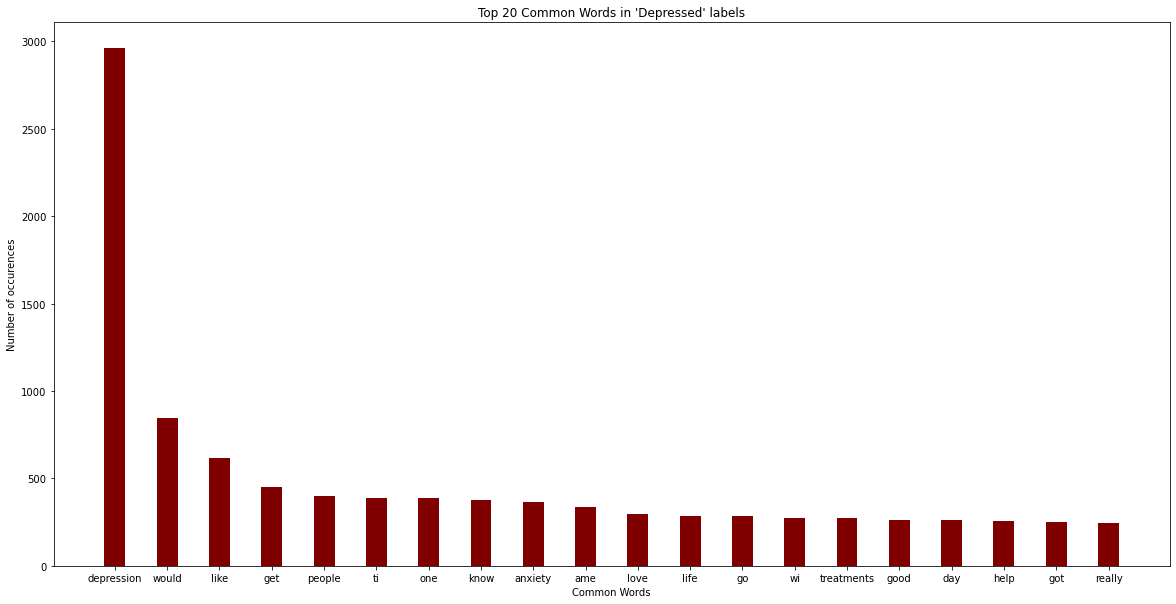

In [89]:
## Visualise in Bar Graph (Popular Words in depressed label)
import matplotlib.pyplot as plt

depressed_words_df = popular_words(df_uncleaned_depressed['Message'])
# depressed_words_df = temp_df.groupby('Common_words').sum().sort_values(by='count',ascending=False)

depressed_words_df
# courses = list(depressed_words_df.keys())
# values = list(depressed_words_df.values())

common_words_list = []
count_list = []

for index, row in depressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Depressed' labels")
plt.show()


**Insights**: After taking a deeper look at only depressed labelled tweets, we are able to notice extra words such as "treatments" and "help" to name a few. We are able to also observe that there are many words that are common in the whole dataset also appear for the most common words of depressed labelled tweets. However, some of these words may also appear in non depressed label tweets. Therefore, further filtering can be done to find out the most common words that strictly only appear for depressed labelled tweets to ensure only words representative of the label is extracted.

> Getting the most popular words for the whole dataset for non-depressed labelled tweets

In [90]:
# Find Common Words in non-depressed labels (To see if they are overlaps)
df_uncleaned_nondepressed =df_uncleaned[df_uncleaned["Label"] == 0] 
df_uncleaned_nondepressed.shape

(16114, 3)

In [91]:
from collections import Counter

# function for checking popular words in non-depressed labels:
def popular_words(series):
#     data1['temp_list'] = series.apply(lambda x:str(x).split())
    top = Counter([item for sublist in df_uncleaned_nondepressed['Tokenised'] for item in sublist])
    temp = pd.DataFrame(top.most_common(20))
    temp.columns = ['Common_words','count']
    return temp

popular_words(df_uncleaned_nondepressed['Message'])

,Common_words,count
0,would,1297
1,good,778
2,like,734
3,ame,658
4,love,656
5,ti,608
6,wi,582
7,day,559
8,one,546
9,know,528


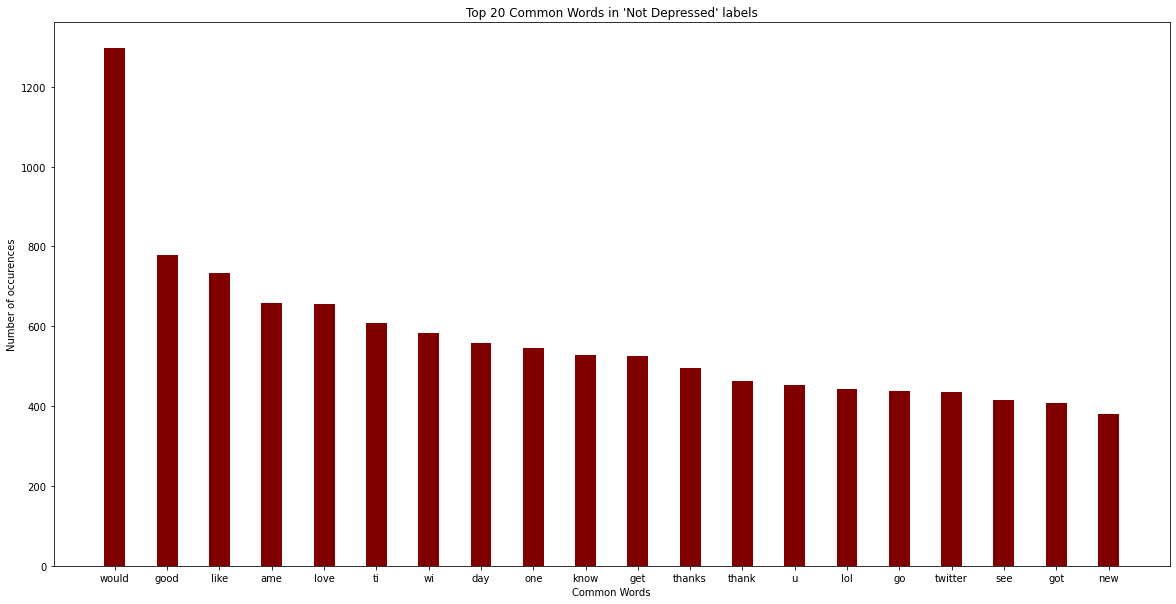

In [92]:
## seems like there's omething werong with this graph - braint not functiomning well now 
## UPDATE: all okie noww
## Visualise in Bar Graph (Popular Words in NON depressed label)
import matplotlib.pyplot as plt

nondepressed_words_df = popular_words(df_uncleaned_nondepressed['Message'])

nondepressed_words_df

common_words_list = []
count_list = []

for index, row in nondepressed_words_df.iterrows():
    common_words_list.append(row['Common_words'])
    count_list.append(row['count'])
    

fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(common_words_list, count_list, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Top 20 Common Words in 'Not Depressed' labels")
plt.show()


**Insights**: Looking at the common words in the non depressed label tweets, we are able to see words like "would" and "like" which appears in both depressed and non depressed label tweets. We need to filter any other words that may exist in both labels to ensure that we can extract the unique common words of the depressed label tweets.

> Getting the most common unique words for depressed labelled tweets (top words that only appears in depressed labelled tweets)

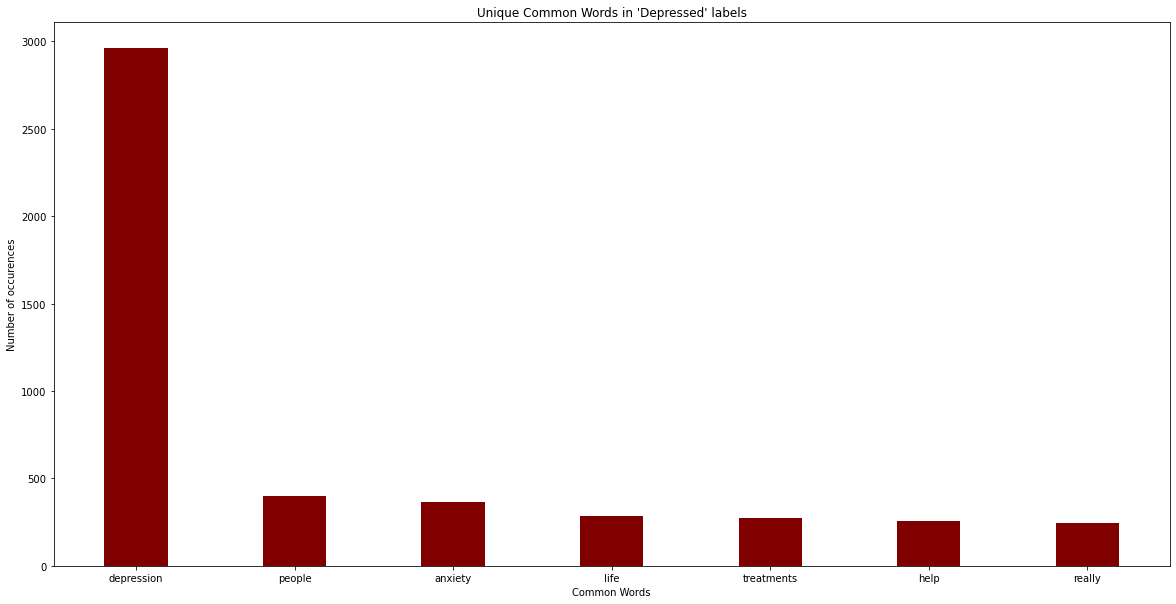

In [93]:
#Find common words in depressed labels that do not appear in non depressed labels

# Depressed dataframe
depressed_words_df

depressed_words = []
depressed_count = []

for index, row in depressed_words_df.iterrows():
    depressed_words.append(row['Common_words'])
    depressed_count.append(row['count'])

# Non Depressed dataframe
nondepressed_words_df

nondepressed_words = []
nondepressed_count = []

for index, row in nondepressed_words_df.iterrows():
    nondepressed_words.append(row['Common_words'])
    nondepressed_count.append(row['count'])


unique_depressed_words = []
unique_depressed_count = []

for i in range(len(depressed_words)):
    if depressed_words[i] not in nondepressed_words:
        unique_depressed_words.append(depressed_words[i])
        unique_depressed_count.append(depressed_count[i])

        
# Plot Bar Graph
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(unique_depressed_words, unique_depressed_count, color ='maroon',
        width = 0.4)
 
plt.xlabel("Common Words")
plt.ylabel("Number of occurences")
plt.title("Unique Common Words in 'Depressed' labels")
plt.show()

**Insights**: After obtaining the unique words for the depressed label tweets, we are able to identify 8 unique words that only exist in the depressed labelled tweets.

In [174]:
df_uncleaned.head()

,Message,Label,Tokenised
0,real good moment miss hi much,0,"[real, good, moment, missssssssss, hi, much]"
1,reading manga,0,"[reading, manga]"
2,,0,[]
3,need send em accountant tomorrow oddly even refer tax support evi wouldence though,0,"[need, send, em, accountant, tomorrow, oddly, even, referring, taxes, supporting, evi, wouldence, though]"
4,add myspace myspacecomlookthunder,0,"[add, myspace, myspacecomlookthunder]"


In [175]:
df_cleaned = df_uncleaned[["Message","Label"]]

In [176]:
df_cleaned.reset_index(inplace=True)

In [177]:
df_cleaned.head()

,index,Message,Label
0,0,real good moment miss hi much,0
1,1,reading manga,0
2,2,,0
3,3,need send em accountant tomorrow oddly even refer tax support evi wouldence though,0
4,4,add myspace myspacecomlookthunder,0


In [178]:
df_cleaned.shape

(26609, 3)

In [179]:
list_of_index = df_cleaned[df_cleaned['Message'] == ''].index.values.tolist()
print(list_of_index)
print(f'number of row with empty string: {len(list_of_index)}')

[2, 156, 263, 526, 718, 778, 809, 1233, 1461, 1480, 2053, 2708, 2800, 2948, 3394, 3477, 3506, 3779, 3821, 3960, 4153, 4289, 4294, 4478, 4773, 4837, 5005, 5201, 5496, 5511, 5677, 6413, 6432, 6529, 6570, 7279, 7471, 7707, 9034, 9583, 9606, 9704, 9718, 10197, 10313, 10378, 10404, 10428, 10480, 10524, 10641, 10652, 10665, 10740, 10775, 10806, 11015, 11045, 11082, 11104, 11122, 11126, 11167, 11247, 12929, 12957, 12980, 13054, 13102, 13103, 13195, 13233, 13591, 13596, 13611, 13699, 13707, 13715, 13808, 13821, 13917, 13972, 13993, 14026, 14044, 14066, 14155, 14365, 14541, 15106, 15267, 15324, 15327, 15331, 16112, 16170, 16218, 16454, 16522, 16549, 16584, 16592, 16607, 16633, 16653, 16682, 16686, 16694, 16733, 16797, 17097, 17322, 17383, 17725, 18411, 18474, 18599, 19114, 19116, 19319, 19324, 19558, 19567, 19722, 19829, 21730, 21868, 21925, 22011, 22391, 22530, 22566, 22639, 22774, 22947, 23161, 23305, 23412, 23489, 23518, 23609, 23610, 23677, 24068, 24123, 24365, 24625]
number of row with emp

In [180]:
df_cleaned.iloc[list_of_index]

,index,Message,Label
2,2,,0
156,156,,0
263,263,,0
526,526,,0
718,718,,0
778,778,,0
809,809,,0
1233,1233,,0
1461,1461,,0
1480,1480,,0


##### Drop row with empty string

In [181]:
df_cleaned.drop(index=list_of_index, inplace = True)

C:\Users\evely\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [184]:
df_cleaned.shape

(26462, 3)

### Splitting Training and Testing

In [188]:
x = df_cleaned.Message
y = df_cleaned.Label


In [224]:
x.values

array(['real good moment miss hi much', 'reading manga',
       'need send em accountant tomorrow oddly even refer tax support evi wouldence though',
       ...,
       'flow chart thoroughly oversold piece program documentation frederick brook jr mythical man month',
       'ship safe harbor never mean stay',
       'black hole god divi woulding zero'], dtype=object)

In [193]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

### convert text to vectors

In [195]:
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

<hr>

## Baseline Model

In [203]:
#model
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score



In [204]:
baseline_models = []
baseline_models.append(('Logistic Regression', LogisticRegression(random_state=0)))
baseline_models.append(('Decision Tree Classifier',DecisionTreeClassifier(random_state=0)))
baseline_models.append(('Random Forest', RandomForestClassifier(random_state=0)))
baseline_models.append(("Gradientboost", GradientBoostingClassifier(random_state=345)))
baseline_models.append(('SVM', SVC()))
baseline_models.append(('Multinomial NB', MultinomialNB()))

In [205]:
# set table to table to populate with performance results
col = ['BASELINE_MODEL','TRAIN_ACCURACY_MEAN','TEST_ACCURACY', 'PRECISION', 'RECALL','F1 SCORE']

def runbaselinemodel(Xtrain, ytrain):
    train_acc_results = []
    test_acc_results = []
    #names = []
    
    df_results = pd.DataFrame(columns=col)
    
    i = 0
    # evaluate each model using cross-validation
    for name, model in baseline_models:
        kfold = KFold(n_splits=10)  # 10-fold cross-validation

        # cv accuracy scoring
        cv_acc_results = cross_val_score(model, Xtrain, ytrain, cv=kfold, scoring='accuracy')
        train_acc_results.append(cv_acc_results)

        #test accuracy scoring
        model.fit(Xtrain,ytrain)
                
        pred = model.predict(xv_test)
        test_accuracy = accuracy_score(y_test, pred)
        test_acc_results.append(test_accuracy)
        
        #Confusion Matrix
        cm = confusion_matrix(pred,y_test)
        tn = cm[0][0]
        fn = cm[1][0]
        fp = cm[0][1]
        tp = cm[1][1]
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        f1 = (2*precision*recall)/(precision + recall)

        #names.append(name)
        df_results.loc[i] = [name, round(cv_acc_results.mean()*100, 2), round(test_accuracy*100,2), round(precision*100,2), round(recall*100,2), round(f1*100,2)]

        i += 1
        
    return df_results

In [206]:
baseline_result = runbaselinemodel(xv_train, y_train)

In [207]:
baseline_result.sort_values(by=['TEST_ACCURACY', 'F1 SCORE'], ascending=False)

,BASELINE_MODEL,TRAIN_ACCURACY_MEAN,TEST_ACCURACY,PRECISION,RECALL,F1 SCORE
4,SVM,79.02,80.03,57.35,87.55,69.30
5,Gaussian NB,79.24,79.37,56.08,86.73,68.11
0,Logistic Regression,78.75,79.20,57.08,85.09,68.32
2,Random Forest,78.46,78.60,61.38,79.48,69.27
1,Decision Tree Classifier,74.00,73.88,66.08,67.00,66.54
3,Gradientboost,74.21,73.84,35.19,95.21,51.39


<hr>

## Deep Learning Model

In [280]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU,SimpleRNN, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.layers import InputSpec, Layer
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

https://coderzcolumn.com/tutorials/artificial-intelligence/keras-glove-embeddings-for-text-classification

### Load GloVe Word Embeddings in Memory

download glove - https://nlp.stanford.edu/projects/glove/

In this section, we are simply loading Glove embeddings in memory from the file. We have created a simple dictionary whose keys are tokens (words) and values are embeddings.

In [255]:
import numpy as np

glove_embeddings = {}
with open("./glove.twitter.27B/glove.twitter.27B.200d.txt", 'r', encoding="utf-8") as f:
    for line in f:
        try:
            line = line.split()
            glove_embeddings[line[0]] = np.array(line[1:], dtype=np.float32)
        except:
            continue

In [256]:
embeddings = glove_embeddings["the"]

embeddings.shape, embeddings.dtype

((200,), dtype('float32'))

### Word Embedding

A word embedding is a learned representation for text where words that have the same meaning have a similar representation.

Word embedding methods learn a real-valued vector representation for a predefined fixed sized vocabulary from a corpus of text.

In [257]:
'''
First, we have created an instance of Tokenizer and called fit_on_texts() method on it. We have provided the method train and test examples.
A call to this method will internally populate a vocabulary of all unique tokens in the tokenizer object.

Next, we have called texts_to_sequences() method on Tokenizer object with train and test text examples. 
This method will tokenize each text example into tokens and then retrieve indexes of those tokens from the vocabulary.

Now, each of our text examples is of a different length and hence has a different number of tokens (words). 
We have decided to keep maximum of 50 tokens per text example. To do this, we have called pad_sequences() function on the list 
of token indexes. This method will make sure that each example has exactly 50 token indexes. 
The examples that have more than 50 tokens will be truncated to 50 tokens and those who
have less than 50 tokens will be padded with 0s to bring it to length 50.
'''

maxlen = 100

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(df_cleaned.Message)

## Vectorizing data to keep 50 words per sample.
X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen, truncating="post", value=0.)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen, truncating="post", value=0.)


In [261]:
vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index
print(vocab_size)

23579


In [259]:
print(X_train[:3])

X_train.shape, X_test.shape

[[  238  3081 10847  1343  6916  1484  4564  6917   407   423 10848     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0]
 [ 2453  1312     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0    

((19846, 100), (6616, 100))

In this section, we have implemented the third step of our encoding process that we had explained earlier. We are simply looping through our vocabulary and retrieving GloVe embeddings for each token. We have then stacked embeddings of all tokens of our vocabulary in one big matrix. The matrix have shape (vocab_len, embed_len). The embedding length in our case is 300 as we had said earlier.

We can now retrieve glove embedding from this matrix by integer indexing it using the token index of that token. To explain it with an example, let's say that the index of 'the' token in our vocabulary is '1' then we can simply index embedding matrix like 'embedding_matrix[1]' to retrieve the embedding of the token 'the'.

In [265]:
embed_len = 200

word_embeddings = np.zeros((len(tokenizer.index_word)+1, embed_len))

for idx, word in tokenizer.index_word.items():
    word_embeddings[idx] = glove_embeddings.get(word, np.zeros(embed_len))

In [278]:
word_embeddings[1][:3]

array([0.14515001, 0.32532001, 0.31202999])

In [238]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

##### Define Network

In [273]:
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 100, 200)          4715800   
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_11 (Dense)            (None, 10)                200010    
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 4,915,821
Trainable params: 200,021
Non-trainable params: 4,715,800
_________________________________________________________________


##### Train Network


In [274]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=32)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Epoch 1/20
621/621 [==============================] - 4s 3ms/step - loss: 0.5106 - accuracy: 0.7475 - val_loss: 0.4857 - val_accuracy: 0.7613
Epoch 2/20
621/621 [==============================] - 2s 3ms/step - loss: 0.4342 - accuracy: 0.7903 - val_loss: 0.4811 - val_accuracy: 0.7594
Epoch 3/20
621/621 [==============================] - 2s 3ms/step - loss: 0.3917 - accuracy: 0.8086 - val_loss: 0.4930 - val_accuracy: 0.7597
Epoch 4/20
621/621 [==============================] - 2s 3ms/step - loss: 0.3509 - accuracy: 0.8308 - val_loss: 0.5192 - val_accuracy: 0.7621
Epoch 5/20
621/621 [==============================] - 2s 3ms/step - loss: 0.3159 - accuracy: 0.8510 - val_loss: 0.5471 - val_accuracy: 0.7595
Epoch 6/20
621/621 [==============================] - 4s 6ms/step - loss: 0.2847 - accuracy: 0.8640 - val_loss: 0.5800 - val_accuracy: 0.7494
Epoch 7/20
621/621 [==============================] - 4s 6ms/step - loss: 0.2553 - accuracy: 0.8851 - val_loss: 0.6248 - val_accuracy: 0.7512
Epoch 

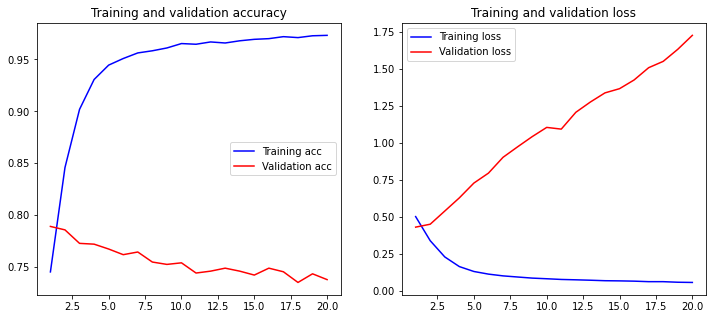

In [239]:
plot_history(history)

Global max/average pooling takes the maximum/average of all features whereas in the other case you have to define the pool size. Keras has again its own layer that you can add in the sequential model:

#### basline model using embedding layers and simpleRNN

In [287]:
# basline model using embedding layers and simpleRNN
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.20, activation='tanh', return_sequences=True)))
model.add(Bidirectional(SimpleRNN(64, dropout=0.1, recurrent_dropout=0.30, activation='tanh', return_sequences=True)))
model.add(SimpleRNN(32, activation='tanh'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 100, 200)          4715800   
                                                                 
 bidirectional_7 (Bidirectio  (None, 100, 128)         33920     
 nal)                                                            
                                                                 
 bidirectional_8 (Bidirectio  (None, 100, 128)         24704     
 nal)                                                            
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 32)                5152      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_16 (Dense)            (None, 1)               

In [288]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)

loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

KeyboardInterrupt: 

### Convolutional Neural Networks (CNN)

Convolutional neural networks or also called convnets are one of the most exciting developments in machine learning in recent years.

They have revolutionized image classification and computer vision by being able to extract features from images and using them in neural networks. The properties that made them useful in image processing makes them also handy for sequence processing. You can imagine a CNN as a specialized neural network that is able to detect specific patterns.

A CNN has hidden layers which are called convolutional layers. When you think of images, a computer has to deal with a two dimensional matrix of numbers and therefore you need some way to detect features in this matrix. These convolutional layers are able to detect edges, corners and other kinds of textures which makes them such a special tool. The convolutional layer consists of multiple filters which are slid across the image and are able to detect specific features.

In [244]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 100)          1968100   
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           64128     
                                                                 
 global_max_pooling1d_2 (Glo  (None, 128)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 10)                1290      
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 2,033,529
Trainable params: 2,033,529
Non-trainable params: 0
____________________________________________

Training Accuracy: 0.9819
Testing Accuracy:  0.7610


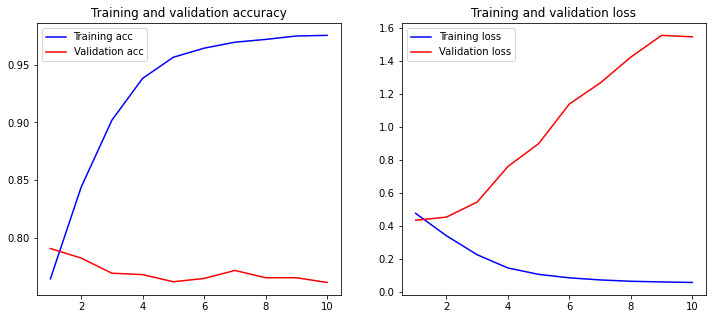

In [245]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

### Bi-Directional LSTM

In [250]:
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embed_len, 
                           input_length=maxlen, trainable=False, weights=[word_embeddings]))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 

Training Accuracy: 0.9479
Testing Accuracy:  0.7692


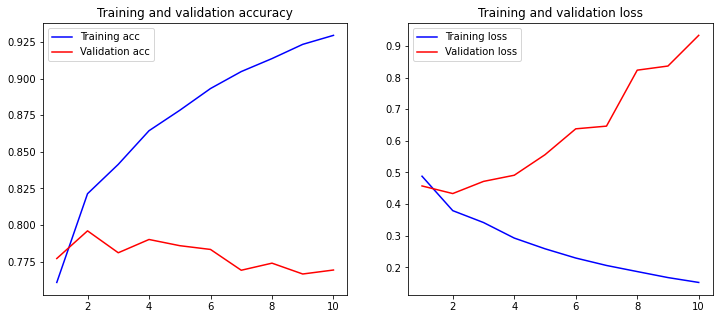

In [252]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)